# <font color='CC3D3D'>데이터 불러오기

In [1]:
#기본 패키지
import time
import warnings
warnings.filterwarnings('ignore')

#데이터 처리 패키지
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user
from matplotlib import rc 
rc('font', family='malgun gothic')
rc('axes', unicode_minus = False)
import seaborn as sns
plt.style.use('ggplot')

#수학 패키지
from scipy.stats.mstats import gmean
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import uuid
import random
from tqdm import tqdm, tqdm_notebook
from itertools import combinations

#머신러닝 패키지
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.linear_model import BayesianRidge
from vecstack import stacking, StackingTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse

#딥러닝 패키지
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import * #Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
#from keras.utils.np_utils import *
#from tensorflow.keras.utils.vis_utils import * #model_to_dot
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import *
from tensorflow.keras import layers
print('tf Version \n', tf.__version__)
print('tf.keras Version \n', tf.keras.__version__)

#import kerastuner as kt
import datetime
import os
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

import shap

import klib
# Dacon plotly 그림 업로드 
pd.options.plotting.backend = 'plotly'
## plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"
pd.set_option('display.max_columns', None)

import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss

tf Version 
 2.6.0
tf.keras Version 
 2.6.0


In [15]:
train = pd.read_csv('L.POINT_train.csv', encoding='UTF-8')
test = pd.read_csv('L.POINT_test.csv', encoding='UTF-8')

In [16]:
train['PD_BUY_AM']  = train['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
train['PD_BUY_CT']  = train['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )
train['TOT_SESS_HR_V']  = train['TOT_SESS_HR_V'].map(lambda x: int(str(x).replace(',','')) )

test['PD_BUY_AM']  = test['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
test['PD_BUY_CT']  = test['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )
test['TOT_SESS_HR_V']  = test['TOT_SESS_HR_V'].map(lambda x: int(str(x).replace(',','')) )

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948686 entries, 0 to 1948685
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CLNT_ID          int64  
 1   SESS_ID          int64  
 2   HITS_SEQ         int64  
 3   PD_C             int64  
 4   PD_ADD_NM        object 
 5   PD_BRA_NM        object 
 6   PD_BUY_AM        int64  
 7   PD_BUY_CT        int64  
 8   SESS_SEQ         int64  
 9   SESS_DT          int64  
 10  TOT_PAG_VIEW_CT  float64
 11  TOT_SESS_HR_V    int64  
 12  DVC_CTG_NM       object 
 13  ZON_NM           object 
 14  CITY_NM          object 
 15  KWD_NM           object 
 16  SEARCH_CNT       int64  
 17  PD_NM            object 
 18  CLAC1_NM         object 
 19  CLAC2_NM         object 
 20  CLAC3_NM         object 
dtypes: float64(1), int64(10), object(10)
memory usage: 312.2+ MB


# NA Values

결측치 확인

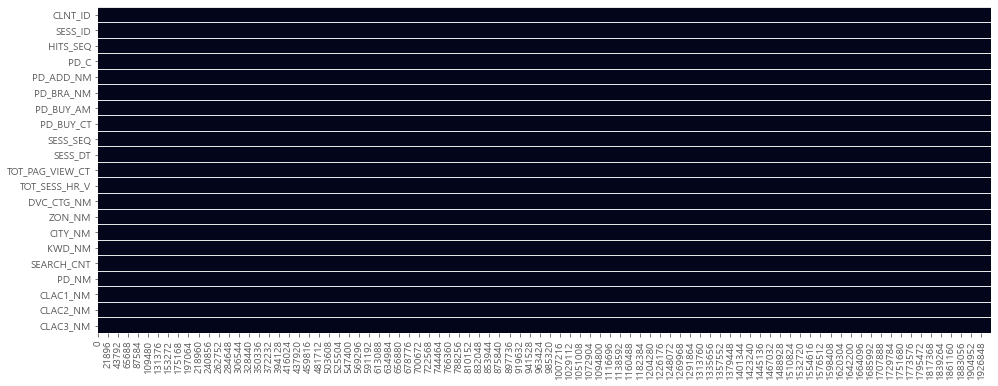

In [65]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

In [66]:
train.isnull().sum().to_frame()

,0
CLNT_ID,0
SESS_ID,0
HITS_SEQ,0
PD_C,0
PD_ADD_NM,0
PD_BRA_NM,0
PD_BUY_AM,0
PD_BUY_CT,0
SESS_SEQ,0
SESS_DT,0


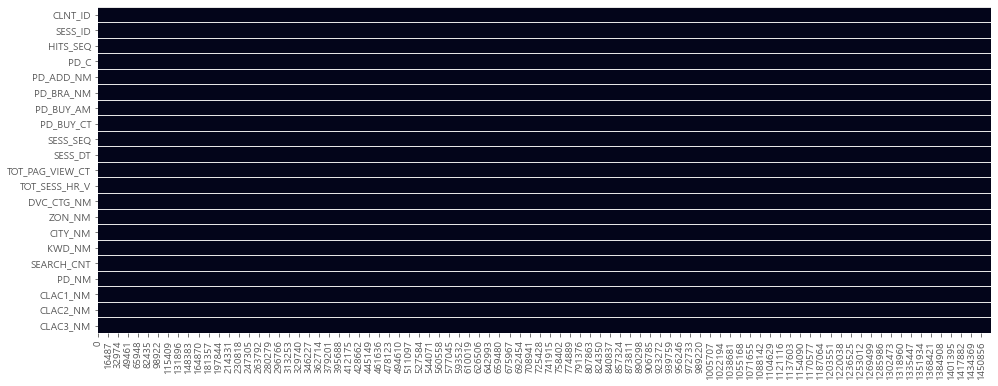

In [67]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [68]:
test.isnull().sum().to_frame()

,0
CLNT_ID,0
SESS_ID,0
HITS_SEQ,0
PD_C,0
PD_ADD_NM,0
PD_BRA_NM,0
PD_BUY_AM,0
PD_BUY_CT,0
SESS_SEQ,0
SESS_DT,0


# 수치형 변수 분포확인

In [69]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

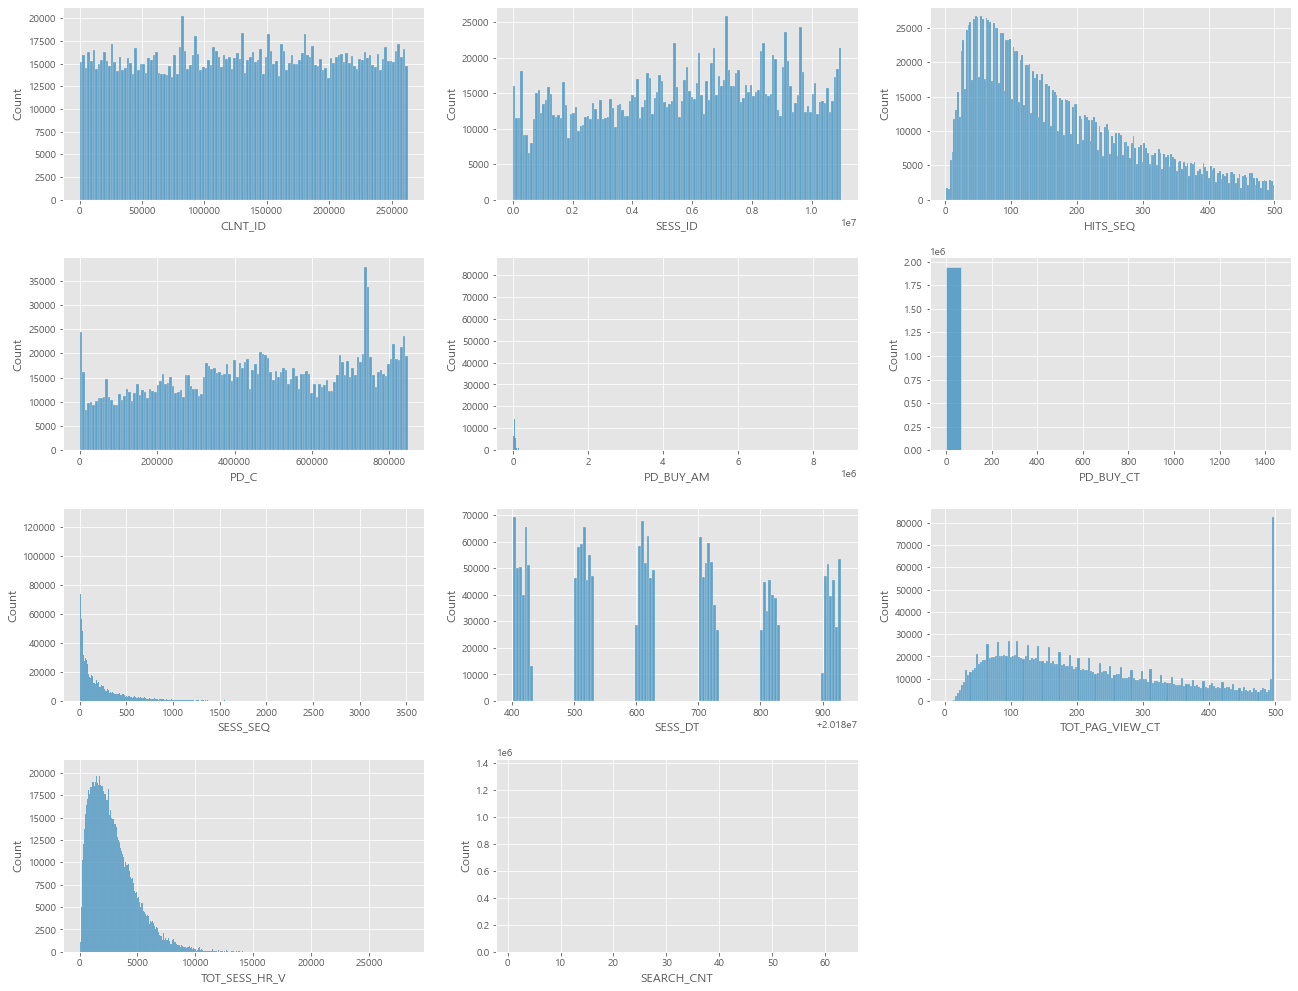

In [70]:
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='SEARCH_CNT', ylabel='Density'>

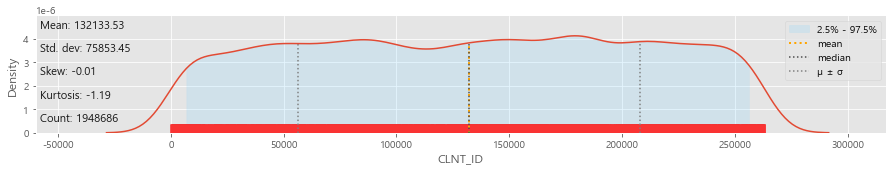

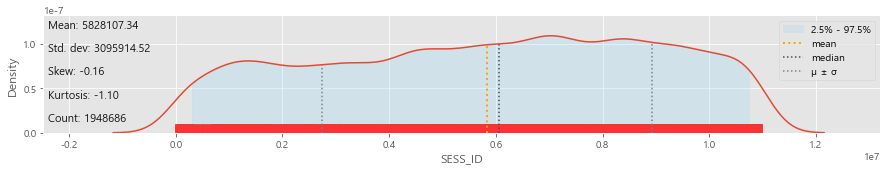

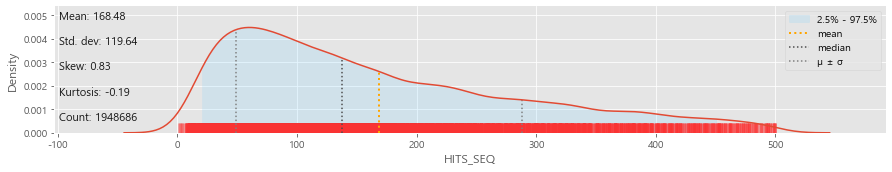

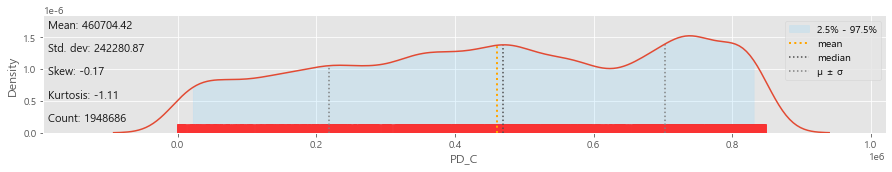

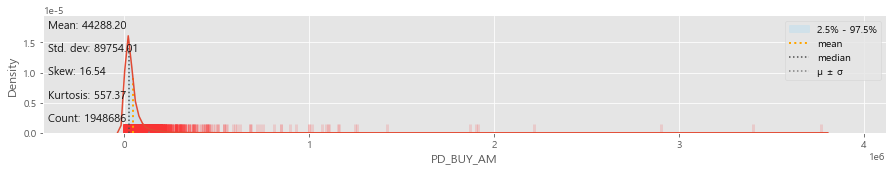

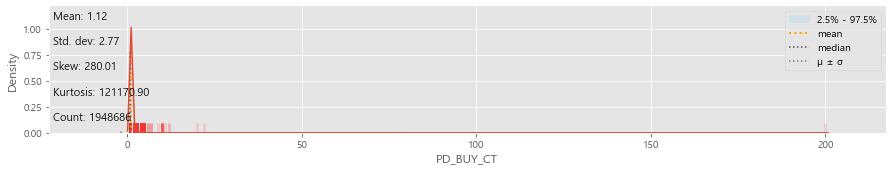

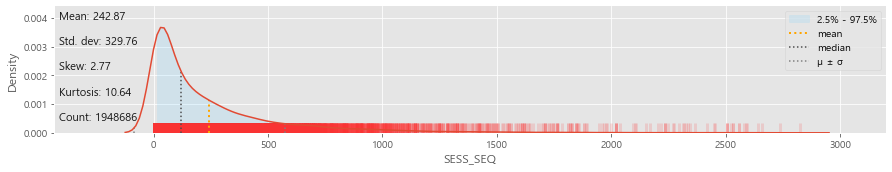

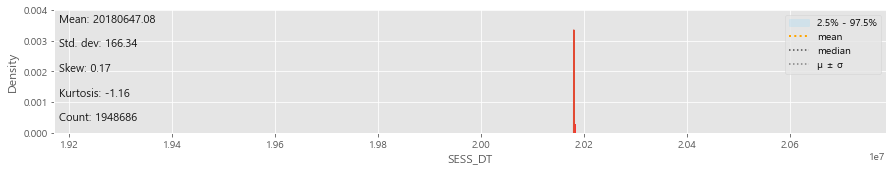

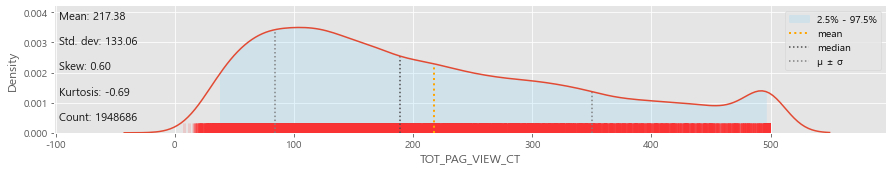

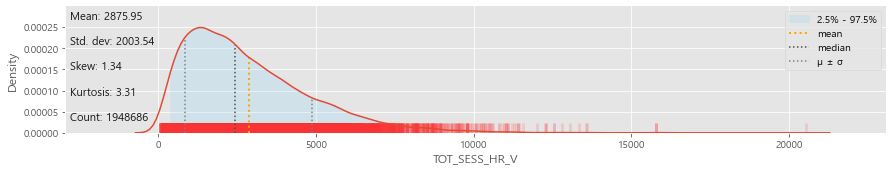

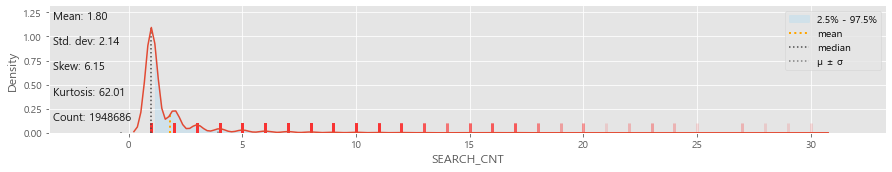

In [ ]:
# 수치형 속성 파악

klib.dist_plot(train)

### 수치형 변수 
skew한 분포를띄고 있는 PD_BUY_AM, PD_BUY_CT, SEARCH_CNT

TOP_PAG_VIEW_CT 컬럼은 꼬리에서 튀어오르는것을 보아 이상치가 존재 아웃라이어 존재 

# 데이터 전처리

# <font color='CC3D3D'>Feature Making

In [71]:
features = []
features_te = []

**[총구매액, 구매건수, 평균구매액, 최대구매액]**

# 수치형

In [17]:
#단일상품 구매금액 + 구매건수 
train['AMOUNT'] = train['PD_BUY_AM'] * train['PD_BUY_CT']
test['AMOUNT'] = test['PD_BUY_AM'] * test['PD_BUY_CT']

In [73]:
f = train.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최소구매액',np.min),
                                            ('최대구매액', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최소구매액',np.min),
                                            ('최대구매액', np.max)]).reset_index()
features_te.append(f_te) ; display(f_te)

,CLNT_ID,총구매액,구매건수,평균구매액,최소구매액,최대구매액
0,0,86500,2,43250,5500,81000
1,1,1276000,16,79750,39000,99000
2,6,148900,7,21271,8000,44900
3,9,42200,4,10550,8500,12600
4,12,510180,32,15943,990,79000
...,...,...,...,...,...,...
149995,263094,10000,1,10000,10000,10000
149996,263095,511000,5,102200,89000,155000
149997,263096,85500,3,28500,17000,47000
149998,263102,59400,15,3960,1080,9720


,CLNT_ID,총구매액,구매건수,평균구매액,최소구매액,최대구매액
0,2,560000,11,50909,20000,62100
1,3,851200,8,106400,102400,110400
2,4,125200,6,20867,12800,37000
3,5,380000,12,31667,11000,42000
4,7,457900,16,28619,20600,40000
...,...,...,...,...,...,...
113099,263097,753220,13,57940,25900,105000
113100,263098,601200,6,100200,100200,100200
113101,263099,973000,112,8688,7000,22000
113102,263100,22400,2,11200,9500,12900


In [74]:
f= train.groupby('CLNT_ID')['PD_BUY_CT'].agg([('총구매건수',np.sum),
                                           ('최소구매건수',np.min),
                                           ('최대구매건수',np.max),
                                           ('평균구매건수',np.mean)])
features.append(f);display(f)

f_te=test.groupby('CLNT_ID')['PD_BUY_CT'].agg([('총구매건수',np.sum),
                                           ('최소구매건수',np.min),
                                           ('최대구매건수',np.max),
                                           ('평균구매건수',np.mean)])
features_te.append(f_te) ; display(f_te)


,총구매건수,최소구매건수,최대구매건수,평균구매건수
CLNT_ID,,,,
0,2,1,1,1.000000
1,16,1,1,1.000000
6,7,1,1,1.000000
9,4,1,1,1.000000
12,32,1,1,1.000000
...,...,...,...,...
263094,1,1,1,1.000000
263095,5,1,1,1.000000
263096,3,1,1,1.000000


,총구매건수,최소구매건수,최대구매건수,평균구매건수
CLNT_ID,,,,
2,12,1,2,1.090909
3,8,1,1,1.000000
4,6,1,1,1.000000
5,12,1,1,1.000000
7,16,1,1,1.000000
...,...,...,...,...
263097,13,1,1,1.000000
263098,6,1,1,1.000000
263099,112,1,1,1.000000


**[주말방문비율]**

In [18]:
train['date'] = pd.to_datetime(train['SESS_DT'], format= '%Y%m%d')
test['date'] = pd.to_datetime(test['SESS_DT'], format= '%Y%m%d')

In [76]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))]).reset_index()
features.append(f); display(f)

f_te = test.groupby('CLNT_ID')['date'].agg([
    ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,주말방문비율
0,0,1.000000
1,1,0.125000
2,6,0.857143
3,9,1.000000
4,12,0.250000
...,...,...
149995,263094,0.000000
149996,263095,0.000000
149997,263096,0.000000
149998,263102,0.000000


,CLNT_ID,주말방문비율
0,2,0.000000
1,3,1.000000
2,4,0.333333
3,5,0.000000
4,7,0.312500
...,...,...
113099,263097,0.307692
113100,263098,0.000000
113101,263099,0.000000
113102,263100,0.500000


**[계절방문비율]**

In [77]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('봄-구매비율', lambda x: np.mean( x.dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( x.dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,12])))
]).reset_index()
features.append(f); f

f_te = test.groupby('CLNT_ID')['date'].agg([
    ('봄-구매비율', lambda x: np.mean( x.dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( x.dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,12])))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,2,0.000000,0.909091,0.090909,0.0
1,3,0.000000,0.000000,1.000000,0.0
2,4,0.666667,0.333333,0.000000,0.0
3,5,0.000000,0.000000,1.000000,0.0
4,7,0.437500,0.562500,0.000000,0.0
...,...,...,...,...,...
113099,263097,0.692308,0.307692,0.000000,0.0
113100,263098,0.000000,0.000000,1.000000,0.0
113101,263099,0.000000,1.000000,0.000000,0.0
113102,263100,0.500000,0.500000,0.000000,0.0


In [78]:
#주구매상품군
f= train.groupby('CLNT_ID')['CLAC1_NM'].agg([('주구매상품명', lambda x: x.mode()[0])]).reset_index()
features.append(f)

f_te= test.groupby('CLNT_ID')['CLAC1_NM'].agg([('주구매상품명', lambda x: x.mode()[0])]).reset_index()
features_te.append(f_te)

In [79]:
#구매상품군 다양성
n = train.CLAC1_NM.nunique()
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('구매상품군다양성빙율', lambda x: len(x.unique()) / n)]).reset_index()
features.append(f) ; f

n = test.CLAC1_NM.nunique()
f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('구매상품군다양성빙율', lambda x: len(x.unique()) / n)]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,구매상품군다양성빙율
0,2,0.054054
1,3,0.027027
2,4,0.054054
3,5,0.027027
4,7,0.081081
...,...,...
113099,263097,0.108108
113100,263098,0.027027
113101,263099,0.027027
113102,263100,0.054054


In [80]:
y=pd.read_csv('y_train.csv')

In [81]:
# 선호 브랜드
df = pd.merge(train, y, on='CLNT_ID')

In [82]:
F20=df[df.LABEL=='F20']
F30=df[df.LABEL=='F30']
F40=df[df.LABEL=='F40']
M20=df[df.LABEL=='M20']
M30=df[df.LABEL=='M30']
M40=df[df.LABEL=='M40']

In [83]:
F20_prefer_brd = F20.PD_BRA_NM.value_counts().index[1:11].tolist()
F30_prefer_brd = F30.PD_BRA_NM.value_counts().index[1:11].tolist()
F40_prefer_brd = F40.PD_BRA_NM.value_counts().index[1:11].tolist()
M20_prefer_brd = M20.PD_BRA_NM.value_counts().index[1:11].tolist()
M30_prefer_brd = M30.PD_BRA_NM.value_counts().index[1:11].tolist()
M40_prefer_brd = M40.PD_BRA_NM.value_counts().index[1:11].tolist()

In [84]:
def F20_brd(x):
    if x == F20_prefer_brd[0]:
        x=10
    elif x == F20_prefer_brd[1]:
        x=9
    elif x == F20_prefer_brd[2]:
        x=8
    elif x == F20_prefer_brd[3]:
        x=7
    elif x == F20_prefer_brd[4]:
        x=6
    elif x == F20_prefer_brd[5]:
        x=5
    elif x == F20_prefer_brd[6]:
        x=4
    elif x == F20_prefer_brd[7]:
        x=3
    elif x == F20_prefer_brd[8]:
        x=2
    elif x == F20_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [85]:
def F30_brd(x):
    if x == F30_prefer_brd[0]:
        x=10
    elif x == F30_prefer_brd[1]:
        x=9
    elif x == F30_prefer_brd[2]:
        x=8
    elif x == F30_prefer_brd[3]:
        x=7
    elif x == F30_prefer_brd[4]:
        x=6
    elif x == F30_prefer_brd[5]:
        x=5
    elif x == F30_prefer_brd[6]:
        x=4
    elif x == F30_prefer_brd[7]:
        x=3
    elif x == F30_prefer_brd[8]:
        x=2
    elif x == F30_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [86]:
def F40_brd(x):
    if x == F40_prefer_brd[0]:
        x=10
    elif x == F40_prefer_brd[1]:
        x=9
    elif x == F40_prefer_brd[2]:
        x=8
    elif x == F40_prefer_brd[3]:
        x=7
    elif x == F40_prefer_brd[4]:
        x=6
    elif x == F40_prefer_brd[5]:
        x=5
    elif x == F40_prefer_brd[6]:
        x=4
    elif x == F40_prefer_brd[7]:
        x=3
    elif x == F40_prefer_brd[8]:
        x=2
    elif x == F40_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [87]:
def M20_brd(x):
    if x == M20_prefer_brd[0]:
        x=10
    elif x == M20_prefer_brd[1]:
        x=9
    elif x == M20_prefer_brd[2]:
        x=8
    elif x == M20_prefer_brd[3]:
        x=7
    elif x == M20_prefer_brd[4]:
        x=6
    elif x == M20_prefer_brd[5]:
        x=5
    elif x == M20_prefer_brd[6]:
        x=4
    elif x == M20_prefer_brd[7]:
        x=3
    elif x == M20_prefer_brd[8]:
        x=2
    elif x == M20_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [88]:
def M30_brd(x):
    if x == M30_prefer_brd[0]:
        x=10
    elif x == M30_prefer_brd[1]:
        x=9
    elif x == M30_prefer_brd[2]:
        x=8
    elif x == M30_prefer_brd[3]:
        x=7
    elif x == M30_prefer_brd[4]:
        x=6
    elif x == M30_prefer_brd[5]:
        x=5
    elif x == M30_prefer_brd[6]:
        x=4
    elif x == M30_prefer_brd[7]:
        x=3
    elif x == M30_prefer_brd[8]:
        x=2
    elif x == M30_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [89]:
def M40_brd(x):
    if x == M40_prefer_brd[0]:
        x=10
    elif x == M40_prefer_brd[1]:
        x=9
    elif x == M40_prefer_brd[2]:
        x=8
    elif x == M40_prefer_brd[3]:
        x=7
    elif x == M40_prefer_brd[4]:
        x=6
    elif x == M40_prefer_brd[5]:
        x=5
    elif x == M40_prefer_brd[6]:
        x=4
    elif x == M40_prefer_brd[7]:
        x=3
    elif x == M40_prefer_brd[8]:
        x=2
    elif x == M40_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [90]:
train['F20_point'] = train['PD_BRA_NM'].apply(F20_brd)
train['F30_point'] = train['PD_BRA_NM'].apply(F30_brd)
train['F40_point'] = train['PD_BRA_NM'].apply(F40_brd)
train['M20_point'] = train['PD_BRA_NM'].apply(M20_brd)
train['M30_point'] = train['PD_BRA_NM'].apply(M30_brd)
train['M40_point'] = train['PD_BRA_NM'].apply(M40_brd)

test['F20_point'] = test['PD_BRA_NM'].apply(F20_brd)
test['F30_point'] = test['PD_BRA_NM'].apply(F30_brd)
test['F40_point'] = test['PD_BRA_NM'].apply(F40_brd)
test['M20_point'] = test['PD_BRA_NM'].apply(M20_brd)
test['M30_point'] = test['PD_BRA_NM'].apply(M30_brd)
test['M40_point'] = test['PD_BRA_NM'].apply(M40_brd)

In [91]:
F20_brd_point=train.groupby('CLNT_ID')['F20_point'].mean().reset_index()
F30_brd_point=train.groupby('CLNT_ID')['F30_point'].mean().reset_index()
F40_brd_point=train.groupby('CLNT_ID')['F40_point'].mean().reset_index()
M20_brd_point=train.groupby('CLNT_ID')['M20_point'].mean().reset_index()
M30_brd_point=train.groupby('CLNT_ID')['M30_point'].mean().reset_index()
M40_brd_point=train.groupby('CLNT_ID')['M40_point'].mean().reset_index()

te_F20_brd_point=test.groupby('CLNT_ID')['F20_point'].mean().reset_index()
te_F30_brd_point=test.groupby('CLNT_ID')['F30_point'].mean().reset_index()
te_F40_brd_point=test.groupby('CLNT_ID')['F40_point'].mean().reset_index()
te_M20_brd_point=test.groupby('CLNT_ID')['M20_point'].mean().reset_index()
te_M30_brd_point=test.groupby('CLNT_ID')['M30_point'].mean().reset_index()
te_M40_brd_point=test.groupby('CLNT_ID')['M40_point'].mean().reset_index()

In [92]:
features.append(F20_brd_point)
features.append(F30_brd_point)
features.append(F40_brd_point)
features.append(M20_brd_point)
features.append(M30_brd_point)
features.append(M40_brd_point)

features_te.append(te_F20_brd_point)
features_te.append(te_F30_brd_point)
features_te.append(te_F40_brd_point)
features_te.append(te_M20_brd_point)
features_te.append(te_M30_brd_point)
features_te.append(te_M40_brd_point)


In [93]:
#브랜드 다양성
n = train.PD_BRA_NM.nunique()
f = train.groupby('CLNT_ID')['PD_BRA_NM'].agg([('브랜드다양성', lambda x: len(x.unique()) / n)]).reset_index()
features.append(f) ; f

n = test.PD_BRA_NM.nunique()
f_te = test.groupby('CLNT_ID')['PD_BRA_NM'].agg([('브랜드다양성', lambda x: len(x.unique()) / n)]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,브랜드다양성
0,2,0.000347
1,3,0.000231
2,4,0.000231
3,5,0.000231
4,7,0.000810
...,...,...
113099,263097,0.000463
113100,263098,0.000116
113101,263099,0.000116
113102,263100,0.000231


In [94]:
#히트 세션 평균
f=train.groupby('CLNT_ID')['HITS_SEQ'].agg([('히트세션평균',np.mean)])
features.append(f) ; f

f_te=test.groupby('CLNT_ID')['HITS_SEQ'].agg([('히트세션평균',np.mean)])
features_te.append(f_te) ; f_te

,히트세션평균
CLNT_ID,
2,234.181818
3,39.500000
4,23.666667
5,53.000000
7,139.562500
...,...
263097,346.230769
263098,152.000000
263099,275.000000


In [95]:
#세션시간 평균
f=train.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([('총세션시간평균',np.mean)])
features.append(f) ; f

f_te=test.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([('총세션시간평균',np.mean)])
features_te.append(f_te) ; f_te

,총세션시간평균
CLNT_ID,
2,4385.545455
3,1051.000000
4,699.666667
5,3214.000000
7,4468.937500
...,...
263097,3313.769231
263098,1175.000000
263099,3890.000000


In [96]:
#홈페이지조회시간
f = train.groupby('CLNT_ID')['TOT_PAG_VIEW_CT'].agg([('페이지접속건수', np.size),
                                            ('평균페이지조회건수', lambda x : np.round(np.mean(x))),
                                            ('최대페이지조회건수', np.max)]).reset_index()
features.append(f)

f_te = test.groupby('CLNT_ID')['TOT_PAG_VIEW_CT'].agg([('페이지접속건수', np.size),
                                            ('평균페이지조회건수', lambda x : np.round(np.mean(x))),
                                            ('최대페이지조회건수', np.max)]).reset_index()
features_te.append(f_te)

In [97]:
#구매세션 평균
f=train.groupby('CLNT_ID')['SESS_SEQ'].agg([('구매세션평균',np.mean)])
features.append(f) ; f

f_te=test.groupby('CLNT_ID')['SESS_SEQ'].agg([('구매세션평균',np.mean)])
features_te.append(f_te) ; f_te

,구매세션평균
CLNT_ID,
2,37.272727
3,1.000000
4,73.666667
5,11.000000
7,99.562500
...,...
263097,362.230769
263098,342.000000
263099,5.000000


In [98]:
#구매세션
f = train.groupby('CLNT_ID')['SEARCH_CNT'].agg([('평균검색건수', lambda x : np.mean(x)),
                                            ('최대검색건수', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['SEARCH_CNT'].agg([('평균검색건수', lambda x : np.mean(x)),
                                            ('최대검색건수', np.max)]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,평균검색건수,최대검색건수
0,0,1.000000,1
1,1,1.437500,2
2,6,1.142857,2
3,9,10.500000,13
4,12,1.656250,4
...,...,...,...
149995,263094,1.000000,1
149996,263095,2.200000,3
149997,263096,1.000000,1
149998,263102,1.200000,2


,CLNT_ID,평균검색건수,최대검색건수
0,2,2.090909,3
1,3,1.500000,3
2,4,1.833333,2
3,5,1.250000,2
4,7,1.000000,1
...,...,...,...
113099,263097,3.384615,9
113100,263098,1.166667,2
113101,263099,1.142857,2
113102,263100,1.000000,1


## 현지씨 피쳐

In [99]:
#
f = train.groupby('CLNT_ID')['PD_BUY_AM'].agg([('상품금액평균', lambda x : np.mean(x)),
                                               ('최저가 구매 상품', np.min),
                                               ('최고가 구매 상품', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['PD_BUY_AM'].agg([('상품금액평균', lambda x : np.mean(x)),
                                                 ('최저가 구매 상품', np.min),
                                                 ('최고가 구매 상품', np.max)]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,상품금액평균,최저가 구매 상품,최고가 구매 상품
0,0,43250.000000,5500,81000
1,1,79750.000000,39000,99000
2,6,21271.428571,8000,44900
3,9,10550.000000,8500,12600
4,12,15943.125000,990,79000
...,...,...,...,...
149995,263094,10000.000000,10000,10000
149996,263095,102200.000000,89000,155000
149997,263096,28500.000000,17000,47000
149998,263102,1080.000000,1080,1080


,CLNT_ID,상품금액평균,최저가 구매 상품,최고가 구매 상품
0,2,50000.000000,10000,62100
1,3,106400.000000,102400,110400
2,4,20866.666667,12800,37000
3,5,31666.666667,11000,42000
4,7,28618.750000,20600,40000
...,...,...,...,...
113099,263097,57940.000000,25900,105000
113100,263098,100200.000000,100200,100200
113101,263099,8687.500000,7000,22000
113102,263100,11200.000000,9500,12900


In [100]:
#
f = train.groupby('CLNT_ID')['date'].agg([
    ('상반기-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,3,4,5,6]))),
    ('하반기-구매비율', lambda x: np.mean( x.dt.month.isin([7,8,9,10,11,12])))
]).reset_index()
features.append(f); f

,CLNT_ID,상반기-구매비율,하반기-구매비율
0,0,1.0,0.0
1,1,1.0,0.0
2,6,1.0,0.0
3,9,1.0,0.0
4,12,0.0,1.0
...,...,...,...
149995,263094,1.0,0.0
149996,263095,0.8,0.2
149997,263096,0.0,1.0
149998,263102,1.0,0.0


In [101]:
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('상반기-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,3,4,5,6]))),
    ('하반기-구매비율', lambda x: np.mean( x.dt.month.isin([7,8,9,10,11,12])))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,상반기-구매비율,하반기-구매비율
0,2,0.909091,0.090909
1,3,0.000000,1.000000
2,4,0.666667,0.333333
3,5,0.000000,1.000000
4,7,0.500000,0.500000
...,...,...,...
113099,263097,1.000000,0.000000
113100,263098,0.000000,1.000000
113101,263099,0.000000,1.000000
113102,263100,1.000000,0.000000


In [102]:
#
f = train.groupby('CLNT_ID')['date'].agg([
    ('월초-구매비율', lambda x: np.mean( x.dt.day<16)),
    ('월말-구매비율', lambda x: np.mean( x.dt.day>15))
]).reset_index()
features.append(f); f

,CLNT_ID,월초-구매비율,월말-구매비율
0,0,1.000000,0.000000
1,1,0.125000,0.875000
2,6,0.142857,0.857143
3,9,0.000000,1.000000
4,12,0.843750,0.156250
...,...,...,...
149995,263094,0.000000,1.000000
149996,263095,0.800000,0.200000
149997,263096,1.000000,0.000000
149998,263102,1.000000,0.000000


In [103]:
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('월초-구매비율', lambda x: np.mean( x.dt.day<16)),
    ('월말-구매비율', lambda x: np.mean( x.dt.day>15))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,월초-구매비율,월말-구매비율
0,2,1.000000,0.000000
1,3,1.000000,0.000000
2,4,1.000000,0.000000
3,5,1.000000,0.000000
4,7,0.937500,0.062500
...,...,...,...
113099,263097,0.692308,0.307692
113100,263098,1.000000,0.000000
113101,263099,1.000000,0.000000
113102,263100,0.000000,1.000000


# 수민씨 피쳐

In [104]:
f = train.groupby('CLNT_ID')['KWD_NM'].agg([
    ('검색 키워드 개수' , lambda x : x.nunique())]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['KWD_NM'].agg([
    ('검색 키워드 개수' , lambda x : x.nunique())]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,검색 키워드 개수
0,0,1
1,1,9
2,6,2
3,9,2
4,12,12
...,...,...
149995,263094,1
149996,263095,5
149997,263096,1
149998,263102,5


,CLNT_ID,검색 키워드 개수
0,2,6
1,3,4
2,4,4
3,5,4
4,7,10
...,...,...
113099,263097,7
113100,263098,6
113101,263099,7
113102,263100,2


In [105]:
f = train.groupby('CLNT_ID')['DVC_CTG_NM'].agg([
    ('mobile', lambda x: np.mean(x == 'mobile')),
    ('tablet', lambda x: np.mean(x =='tablet')),
    ('desktop', lambda x: np.mean(x == 'desktop'))]).reset_index()
features.append(f); f

f_te = test.groupby('CLNT_ID')['DVC_CTG_NM'].agg([
    ('mobile', lambda x: np.mean(x == 'mobile')),
    ('tablet', lambda x: np.mean(x =='tablet')),
    ('desktop', lambda x: np.mean(x == 'desktop'))]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,mobile,tablet,desktop
0,2,1.0,0.0,0.0
1,3,1.0,0.0,0.0
2,4,1.0,0.0,0.0
3,5,1.0,0.0,0.0
4,7,1.0,0.0,0.0
...,...,...,...,...
113099,263097,1.0,0.0,0.0
113100,263098,1.0,0.0,0.0
113101,263099,1.0,0.0,0.0
113102,263100,1.0,0.0,0.0


In [106]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('구매일 수', lambda x: x.nunique()),
    ('구매 주기', lambda x: int(((x.max() - x.min()).days) / x.nunique()))]).reset_index()
features.append(f); f
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('구매일 수', lambda x: x.nunique()),
    ('구매 주기', lambda x: int(((x.max() - x.min()).days) / x.nunique()))]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,구매일 수,구매 주기
0,2,2,40
1,3,1,0
2,4,2,51
3,5,1,0
4,7,5,16
...,...,...,...
113099,263097,2,25
113100,263098,1,0
113101,263099,1,0
113102,263100,2,12


# <font color='CC3D3D'> Feature Merge

In [49]:
#data.to_csv('data.csv')
#data_te.to_csv('data_te.csv')

- PD_C - 상품의 종류, 상품종류 / 상품브랜드 종류, 상품종류 / 구매횟수

- ZON_NM + CITY_NM = 지역주소를 이용하여 어느 고객인지 유추? 피쳐가 너무 많아질 가능성

상품의 종류에 대한 피처

In [107]:
f = train.groupby('CLNT_ID')['PD_C'].agg([
    ('상품의종류', lambda x: x.nunique())]).reset_index()
features.append(f); f
f_te = test.groupby('CLNT_ID')['PD_C'].agg([
    ('상품의종류', lambda x: x.nunique())]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,상품의종류
0,2,3
1,3,2
2,4,2
3,5,2
4,7,7
...,...,...
113099,263097,4
113100,263098,1
113101,263099,4
113102,263100,2


주거지에 대한 피처

In [108]:
train['지역']=train.ZON_NM+train.CITY_NM
test['지역']=test.ZON_NM+test.CITY_NM

In [109]:
# 이사 횟수
f=train.groupby('CLNT_ID')['지역'].nunique().reset_index()
features.append(f)
f_te=test.groupby('CLNT_ID')['지역'].nunique().reset_index()
features_te.append(f_te)

In [110]:
# 주 주거지 ----- word2vec 사용하고 싶은데 이건 나중에 학회시간에 배우면 사용해보자
f=train.groupby('CLNT_ID')['지역'].agg([('주거지', lambda x: x.mode()[0])]).reset_index()
features.append(f)
f_te=test.groupby('CLNT_ID')['지역'].agg([('주거지', lambda x: x.mode()[0])]).reset_index()
features_te.append(f_te)

In [111]:
## 이 상품 구매의 90%이상이 여자일 품목 
listo = []
for i in range(len(train['CLAC1_NM'].unique())):
    listo.append(train['CLAC1_NM'].unique()[i])

listo2 = []
for i in range(len(listo)):
    if '화장품/뷰티케어' in listo[i]:
        listo2.append(listo[i])
    elif '유아동의류' in listo[i]:
        listo2.append(listo[i])
    elif '출산/육아용품' in listo[i]:
        listo2.append(listo[i])
    elif '퍼스널케어' in listo[i]:
        listo2.append(listo[i])
    elif '원예/애완' in listo[i]:
        listo2.append(listo[i])
    elif '여성의류' in listo[i]:
        listo2.append(listo[i])
print('여성 선호 품목 : {}'.format(listo2))

## 이 상품 구매의 90%이상이 남자일 품목 
listo3 = []
for j in range(len(listo)):
    if '남성의류' in listo[j]:
        listo3.append(listo[j])
print('남성 선호 품목 : {}'.format(listo3))

여성 선호 품목 : ['화장품/뷰티케어', '유아동의류', '출산/육아용품', '퍼스널케어', '원예/애완', '여성의류']
남성 선호 품목 : ['남성의류']


In [112]:
#여성선호품목 구매건수
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('여성선호품목구매건수', lambda x: list(x).count('화장품/뷰티케어')+list(x).count('유아동의류')+list(x).count('출산/육아용품')+list(x).count('퍼스널케어')+list(x).count('원예/애완')+list(x).count('여성의류'))]).reset_index()
features.append(f) ; f

f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('여성선호품목구매건수', lambda x: list(x).count('화장품/뷰티케어')+list(x).count('유아동의류')+list(x).count('출산/육아용품')+list(x).count('퍼스널케어')+list(x).count('원예/애완')+list(x).count('여성의류'))]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,여성선호품목구매건수
0,2,1
1,3,0
2,4,2
3,5,12
4,7,13
...,...,...
113099,263097,3
113100,263098,0
113101,263099,0
113102,263100,1


In [113]:
#남성선호품목 구매건수
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('남성선호품목구매건수', lambda x: list(x).count('남성의류'))]).reset_index()
features.append(f) ; f

f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('남성선호품목구매건수', lambda x: list(x).count('남성의류'))]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,남성선호품목구매건수
0,2,0
1,3,0
2,4,4
3,5,0
4,7,2
...,...,...
113099,263097,0
113100,263098,6
113101,263099,112
113102,263100,1


In [126]:
data = pd.DataFrame({'CLNT_ID': train.CLNT_ID.unique()})
for f in features :
    data = pd.merge(data, f, how='left',on='CLNT_ID')
    
data = data.fillna(0)

In [127]:
data_te = pd.DataFrame({'CLNT_ID': test.CLNT_ID.unique()})
for f_te in features_te :
    data_te = pd.merge(data_te, f_te, how='left',on='CLNT_ID')
    
data_te = data_te.fillna(0)

In [129]:
data['여성선호품목구매비율']=data['여성선호품목구매건수']/data['총구매건수']
data_te['여성선호품목구매비율']=data['여성선호품목구매건수']/data['총구매건수']

data['남성선호품목구매비율']=data['남성선호품목구매건수']/data['총구매건수']
data_te['남성선호품목구매비율']=data['남성선호품목구매건수']/data['총구매건수']

In [130]:
a_sub_b = [x for x in data.columns if x not in data_te.columns]
data.drop(a_sub_b, axis=1, inplace=True)

b_sub_a = [x for x in data_te.columns if x not in data.columns]
data_te.drop(b_sub_a,axis=1,inplace=True)

In [131]:
data.shape, data_te.shape

((150000, 52), (113104, 52))

In [157]:
pca_1=pd.get_dummies(data['주거지'])

,BusanBusan,Chungcheongbuk-doBoeun-gun,Chungcheongbuk-doCheongju-si,Chungcheongbuk-doCheongwon-gun,Chungcheongbuk-doChungju-si,Chungcheongbuk-doDanyang-gun,Chungcheongbuk-doEumseong-gun,Chungcheongbuk-doGoesan-gun,Chungcheongbuk-doJecheon-si,Chungcheongbuk-doJeungpyeong-gun,...,Jeollanam-doMuan-gun,Jeollanam-doNaju-si,Jeollanam-doSinan-gun,Jeollanam-doSuncheon-si,Jeollanam-doWando-gun,Jeollanam-doYeongam-gun,Jeollanam-doYeonggwang-gun,Jeollanam-doYeosu-si,SeoulSeoul,UlsanUlsan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
149996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [187]:
pca_2=pd.get_dummies(data_te['주거지'])

In [189]:
a_sub_b = [x for x in pca_1.columns if x not in pca_2.columns]
pca_1.drop(a_sub_b, axis=1, inplace=True)

b_sub_a = [x for x in pca_2.columns if x not in pca_1.columns]
pca_2.drop(b_sub_a,axis=1,inplace=True)

In [222]:
pca = PCA(n_components=max_d, random_state=0).fit(pca_1)

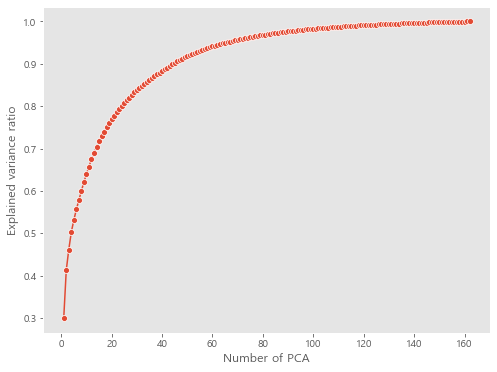

In [213]:
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,pca_1.shape[1]),np.cumsum(pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [224]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(pca_1.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.515641e-01,3.005485e-01,0.300548
pca2,9.435999e-02,1.127337e-01,0.413282
pca3,4.073921e-02,4.867191e-02,0.461954
pca4,3.429881e-02,4.097745e-02,0.502932
pca5,2.384649e-02,2.848986e-02,0.531421
...,...,...,...
pca159,1.000007e-04,1.194727e-04,0.999824
pca160,7.370022e-05,8.805106e-05,0.999912
pca161,6.030529e-05,7.204789e-05,0.999984
pca162,1.341322e-05,1.602504e-05,1.000000


In [246]:
max_d = num_d = pca_1.shape[1]
pca = PCA(n_components=max_d, random_state=0).fit(pca_1)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
num_d = np.argmax(cumsum >= 0.95) + 1
if num_d == 0: num_d = max_d
pca = PCA(n_components=num_d, random_state=0)
new_pca=pca.fit_transform(pca_1)
new_pca= pd.DataFrame(new_pca)

In [250]:
new_pca_te=pca.transform(pca_2)
new_pca_te=pd.DataFrame(new_pca_te)

In [254]:
data.drop('주거지', axis=1 ,inplace=True)
data_te.drop('주거지',axis=1,inplace=True)

In [259]:
for i in range(66):
    new_pca.rename(columns = {i:str(i)+'주거지'},inplace=True)
    
    new_pca_te.rename(columns = {i:str(i)+'주거지'},inplace=True)


In [263]:
data=pd.concat([data,new_pca],axis=1)
data_te=pd.concat([data_te,new_pca_te],axis=1)

In [269]:
pca_1=pd.get_dummies(data['주구매상품명'])

In [268]:
pca_2=pd.get_dummies(data_te['주구매상품명'])

In [273]:
max_d = num_d = pca_1.shape[1]
pca = PCA(n_components=max_d, random_state=0).fit(pca_1)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
num_d = np.argmax(cumsum >= 0.99) + 1
if num_d == 0: num_d = max_d
pca = PCA(n_components=num_d, random_state=0)
new_pca=pca.fit_transform(pca_1)
new_pca= pd.DataFrame(new_pca)

In [275]:
new_pca_te=pca.transform(pca_2)
new_pca_te=pd.DataFrame(new_pca_te)

In [276]:
data.drop('주구매상품명', axis=1 ,inplace=True)
data_te.drop('주구매상품명',axis=1,inplace=True)

In [278]:
for i in range(30):
    new_pca.rename(columns = {i:str(i)+'주구매상품'},inplace=True)
    
    new_pca_te.rename(columns = {i:str(i)+'주구매상품'},inplace=True)


In [279]:
data=pd.concat([data,new_pca],axis=1)
data_te=pd.concat([data_te,new_pca_te],axis=1)

## 여기서 부터 시작

In [ ]:
#검색어 길이 비율피쳐

In [281]:
data.to_csv('pca_data.csv')
data_te.to_csv('pca_data_te.csv')

In [3]:
data=pd.read_csv('pca_data.csv')
data_te=pd.read_csv('pca_data_te.csv')

In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data_te.drop('Unnamed: 0',axis=1,inplace=True)

In [380]:
data.shape, data_te.shape

((150000, 146), (113104, 146))

In [ ]:
# 수치형 속성 파악 
# 그렇게 큰 이상치는 없는것으로 파악, skew한 분포는 후에 로그 치환 ,box-cox변환으로 처리 지금은 귀찮
klib.dist_plot(data)

# 추가피쳐

In [5]:
f=train.groupby('CLNT_ID')['CLAC1_NM'].agg([('구매상품군다양수',lambda x: x.nunique())]).reset_index()
data=pd.merge(data,f,on='CLNT_ID')

f_te=test.groupby('CLNT_ID')['CLAC1_NM'].agg([('구매상품군다양수',lambda x: x.nunique())]).reset_index()
data_te=pd.merge(data_te,f_te,on='CLNT_ID')

In [6]:
f=train.groupby('CLNT_ID')['KWD_NM'].agg([('키워드검색다양수',lambda x: x.nunique())]).reset_index()
data=pd.merge(data,f,on='CLNT_ID')

f_te=test.groupby('CLNT_ID')['KWD_NM'].agg([('키워드검색다양수',lambda x: x.nunique())]).reset_index()
data_te=pd.merge(data_te,f_te,on='CLNT_ID')

In [7]:
f=train.groupby('CLNT_ID')['CLAC2_NM'].agg([('구매상품군2다양수',lambda x: x.nunique())]).reset_index()
data=pd.merge(data,f,on='CLNT_ID')

f_te=test.groupby('CLNT_ID')['CLAC2_NM'].agg([('구매상품군2다양수',lambda x: x.nunique())]).reset_index()
data_te=pd.merge(data_te,f_te,on='CLNT_ID')

In [8]:
f=train.groupby('CLNT_ID')['CLAC3_NM'].agg([('구매상품군3다양수',lambda x: x.nunique())]).reset_index()
data=pd.merge(data,f,on='CLNT_ID')

f_te=test.groupby('CLNT_ID')['CLAC3_NM'].agg([('구매상품군3다양수',lambda x: x.nunique())]).reset_index()
data_te=pd.merge(data_te,f_te,on='CLNT_ID')

In [9]:
train['키워드길이수']=train['KWD_NM'].apply(lambda x: len(x))
test['키워드길이수']=test['KWD_NM'].apply(lambda x: len(x))

In [10]:
#
f = train.groupby('CLNT_ID')['키워드길이수'].agg([('키워드검색평균', lambda x : np.mean(x)),
                                               ('키워드검색최소', np.min),
                                               ('키워드검색최대', np.max)]).reset_index()
data=pd.merge(data,f,on='CLNT_ID')

f_te = test.groupby('CLNT_ID')['키워드길이수'].agg([('키워드검색평균', lambda x : np.mean(x)),
                                                 ('키워드검색최소', np.min),
                                                 ('키워드검색최대', np.max)]).reset_index()
data_te=pd.merge(data_te,f_te,on='CLNT_ID')

In [19]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('내점일수',lambda x: x.nunique()),
    ('구매주기', lambda x: (x.max()-x.min()).days / x.nunique())]).reset_index()

f['내점당 구매액'] = train.groupby('CLNT_ID')['AMOUNT'].sum()/f['내점일수']
f['내점당 구매건수'] = train.groupby('CLNT_ID')['AMOUNT'].size()/f['내점일수']
f = f.fillna(0)

f['내점당 구매당 평균구매액'] = f['내점당 구매액']/f['내점당 구매건수']

f['내점당 구매액비율'] = f['내점당 구매액']/train.groupby('CLNT_ID')['AMOUNT'].sum()
f['내점당 구매건수비율'] = f['내점당 구매건수']/train.groupby('CLNT_ID')['AMOUNT'].size()

f = f.fillna(0)
data=pd.merge(data,f,on='CLNT_ID')

In [20]:
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('내점일수',lambda x: x.nunique()),
    ('구매주기', lambda x: (x.max()-x.min()).days / x.nunique())]).reset_index()

f_te['내점당 구매액'] = test.groupby('CLNT_ID')['AMOUNT'].sum()/f_te['내점일수']
f_te['내점당 구매건수'] = test.groupby('CLNT_ID')['AMOUNT'].size()/f_te['내점일수']
f_te = f_te.fillna(0)

f_te['내점당 구매당 평균구매액'] = f_te['내점당 구매액']/f_te['내점당 구매건수']

f_te['내점당 구매액비율'] = f_te['내점당 구매액']/test.groupby('CLNT_ID')['AMOUNT'].sum()
f_te['내점당 구매건수비율'] = f_te['내점당 구매건수']/test.groupby('CLNT_ID')['AMOUNT'].size()

f_te = f_te.fillna(0)
data_te=pd.merge(data_te,f_te,on='CLNT_ID')

In [21]:
visit = train.groupby('CLNT_ID')['SESS_ID'].agg([('방문수', np.size)])['방문수']
visit_te = test.groupby('CLNT_ID')['SESS_ID'].agg([('방문수', np.size)])['방문수']

In [22]:
f = train.groupby('CLNT_ID')['CLAC1_NM'].value_counts().unstack().fillna(0)
f.columns = ['주구매상품_대분류_'+ str(column) for column in f.columns]

for i in f.columns:
    f[i+'_구매비율'] = f[i] / visit


f = f.fillna(0)


In [23]:
f_te = test.groupby('CLNT_ID')['CLAC1_NM'].value_counts().unstack().fillna(0)
f_te.columns = ['주구매상품_대분류_'+ str(column) for column in f_te.columns]

for i in f_te.columns:
    f_te[i+'_구매비율'] = f_te[i] / visit_te

f_te = f_te.fillna(0)


In [24]:
max_d = num_d = f.shape[1]
pca = PCA(n_components=max_d, random_state=0).fit(f)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
num_d = np.argmax(cumsum >= 0.95) + 1
if num_d == 0: num_d = max_d
pca = PCA(n_components=num_d, random_state=0)
new_pca=pca.fit_transform(f)
new_pca= pd.DataFrame(new_pca)

In [25]:
new_pca_te=pca.transform(f_te)
new_pca_te=pd.DataFrame(new_pca_te)

In [26]:
for i in range(num_d):
    new_pca.rename(columns = {i:str(i)+'대분류상품갯수'},inplace=True)
    
    new_pca_te.rename(columns = {i:str(i)+'대분류상품갯수'},inplace=True)


In [27]:
data=pd.concat([data,new_pca],axis=1)
data_te=pd.concat([data_te,new_pca_te],axis=1)

In [28]:
f = train.groupby('CLNT_ID')['CLAC2_NM'].value_counts().unstack().fillna(0)
f.columns = ['주구매상품_중분류_'+ str(column) for column in f.columns]

for i in f.columns:
    f[i+'_구매비율'] = f[i] / visit

f = f.fillna(0)

In [29]:
f_te = test.groupby('CLNT_ID')['CLAC2_NM'].value_counts().unstack().fillna(0)
f_te.columns = ['주구매상품_중분류_'+ str(column) for column in f_te.columns]

for i in f_te.columns:
    f_te[i+'_구매비율'] = f_te[i] / visit_te

f_te = f_te.fillna(0)


In [30]:
max_d = num_d = f.shape[1]
pca = PCA(n_components=max_d, random_state=0).fit(f)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
num_d = np.argmax(cumsum >= 0.95) + 1
if num_d == 0: num_d = max_d
pca = PCA(n_components=num_d, random_state=0)
new_pca=pca.fit_transform(f)
new_pca= pd.DataFrame(new_pca)

In [31]:
new_pca_te=pca.transform(f_te)
new_pca_te=pd.DataFrame(new_pca_te)

In [32]:
for i in range(num_d):
    new_pca.rename(columns = {i:str(i)+'중분류상품갯수'},inplace=True)
    
    new_pca_te.rename(columns = {i:str(i)+'중분류상품갯수'},inplace=True)


In [33]:
data=pd.concat([data,new_pca],axis=1)
data_te=pd.concat([data_te,new_pca_te],axis=1)

In [34]:
f = train.groupby('CLNT_ID')['CLAC3_NM'].value_counts().unstack().fillna(0)
f.columns = ['주구매상품_소분류_'+ str(column) for column in f.columns]

for i in f.columns:
    f[i+'_구매비율'] = f[i] / visit

f = f.fillna(0)

In [35]:
f_te = test.groupby('CLNT_ID')['CLAC3_NM'].value_counts().unstack().fillna(0)
f_te.columns = ['주구매상품_소분류_'+ str(column) for column in f_te.columns]

for i in f_te.columns:
    f_te[i+'_구매비율'] = f_te[i] / visit_te

f_te = f_te.fillna(0)

In [36]:
a_sub_b = [x for x in f.columns if x not in f_te.columns]
f.drop(a_sub_b, axis=1, inplace=True)

b_sub_a = [x for x in f_te.columns if x not in f.columns]
f_te.drop(b_sub_a,axis=1,inplace=True)

In [37]:
max_d = num_d = f.shape[1]
pca = PCA(n_components=max_d, random_state=0).fit(f)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
num_d = np.argmax(cumsum >= 0.95) + 1
if num_d == 0: num_d = max_d
pca = PCA(n_components=num_d, random_state=0)
new_pca=pca.fit_transform(f)
new_pca= pd.DataFrame(new_pca)

In [38]:
new_pca_te=pca.transform(f_te)
new_pca_te=pd.DataFrame(new_pca_te)

In [39]:
for i in range(num_d):
    new_pca.rename(columns = {i:str(i)+'소분류상품갯수'},inplace=True)
    
    new_pca_te.rename(columns = {i:str(i)+'소분류상품갯수'},inplace=True)


In [40]:
data=pd.concat([data,new_pca],axis=1)
data_te=pd.concat([data_te,new_pca_te],axis=1)

# <font color='CC3D3D'> Modeling

### 로그치환

In [41]:
from scipy.stats import skew, kurtosis


In [42]:
skew_df = pd.DataFrame({'컬럼명': data.columns, 'skew': skew(data)})

In [43]:
skew_df[(skew_df['skew']>2) | (skew_df['skew']<-2)]

,컬럼명,skew
1,총구매액,171.392990
2,구매건수,33.285198
3,평균구매액,14.478011
4,최소구매액,15.483027
5,최대구매액,10.381434
...,...,...
514,274소분류상품갯수,4.282591
516,276소분류상품갯수,3.527696
519,279소분류상품갯수,11.337240
520,280소분류상품갯수,-2.934851


In [10]:
new_skew_df=skew_df[skew_df.컬럼명.str.contains('주구매|주거지') == False]

In [11]:
#주로 금액, 건수 등이 skew한 분포를 보임 로그치환 진행
new_skew_df[(new_skew_df['skew']>2) | (new_skew_df['skew']<-2)]

,컬럼명,skew
1,총구매액,171.392990
2,구매건수,33.285198
3,평균구매액,14.478011
4,최소구매액,15.483027
5,최대구매액,10.381434
6,총구매건수,35.026162
7,최소구매건수,127.620405
8,최대구매건수,134.618179
9,평균구매건수,137.203383
15,구매상품군다양성빙율,3.150490


In [44]:
T_skew_df=skew_df.set_index('컬럼명').T

In [45]:
log_list=[]
for i in list(T_skew_df.columns):
    if (T_skew_df[i]> 2).bool():
        log_list.append(i)

In [46]:
data[log_list]=np.log1p(data[log_list])

data_te[log_list]=np.log1p(data_te[log_list])

In [47]:
skew_df = pd.DataFrame({'컬럼명': data.columns, 'skew': skew(data)})

In [49]:
data

,CLNT_ID,총구매액,구매건수,평균구매액,최소구매액,최대구매액,총구매건수,최소구매건수,최대구매건수,평균구매건수,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,구매상품군다양성빙율,F20_point,F30_point,F40_point,M20_point,M30_point,M40_point,브랜드다양성,히트세션평균,총세션시간평균,페이지접속건수,평균페이지조회건수,최대페이지조회건수,구매세션평균,평균검색건수,최대검색건수,상품금액평균,최저가 구매 상품,최고가 구매 상품,상반기-구매비율,하반기-구매비율,월초-구매비율,월말-구매비율,검색 키워드 개수,mobile,tablet,desktop,구매일 수,구매 주기,상품의종류,지역,여성선호품목구매건수,남성선호품목구매건수,여성선호품목구매비율,남성선호품목구매비율,0주거지,1주거지,2주거지,3주거지,4주거지,5주거지,6주거지,7주거지,8주거지,9주거지,10주거지,11주거지,12주거지,13주거지,14주거지,15주거지,16주거지,17주거지,18주거지,19주거지,20주거지,21주거지,22주거지,23주거지,24주거지,25주거지,26주거지,27주거지,28주거지,29주거지,30주거지,31주거지,32주거지,33주거지,34주거지,35주거지,36주거지,37주거지,38주거지,39주거지,40주거지,41주거지,42주거지,43주거지,44주거지,45주거지,46주거지,47주거지,48주거지,49주거지,50주거지,51주거지,52주거지,53주거지,54주거지,55주거지,56주거지,57주거지,58주거지,59주거지,60주거지,61주거지,62주거지,63주거지,64주거지,65주거지,0주구매상품,1주구매상품,2주구매상품,3주구매상품,4주구매상품,5주구매상품,6주구매상품,7주구매상품,8주구매상품,9주구매상품,10주구매상품,11주구매상품,12주구매상품,13주구매상품,14주구매상품,15주구매상품,16주구매상품,17주구매상품,18주구매상품,19주구매상품,20주구매상품,21주구매상품,22주구매상품,23주구매상품,24주구매상품,25주구매상품,26주구매상품,27주구매상품,28주구매상품,29주구매상품,구매상품군다양수,키워드검색다양수,구매상품군2다양수,구매상품군3다양수,키워드검색평균,키워드검색최소,키워드검색최대,내점일수,구매주기,내점당 구매액,내점당 구매건수,내점당 구매당 평균구매액,내점당 구매액비율,내점당 구매건수비율,0대분류상품갯수,1대분류상품갯수,2대분류상품갯수,3대분류상품갯수,4대분류상품갯수,5대분류상품갯수,6대분류상품갯수,7대분류상품갯수,8대분류상품갯수,9대분류상품갯수,10대분류상품갯수,11대분류상품갯수,12대분류상품갯수,0중분류상품갯수,1중분류상품갯수,2중분류상품갯수,3중분류상품갯수,4중분류상품갯수,5중분류상품갯수,6중분류상품갯수,7중분류상품갯수,8중분류상품갯수,9중분류상품갯수,10중분류상품갯수,11중분류상품갯수,12중분류상품갯수,13중분류상품갯수,14중분류상품갯수,15중분류상품갯수,16중분류상품갯수,17중분류상품갯수,18중분류상품갯수,19중분류상품갯수,20중분류상품갯수,21중분류상품갯수,22중분류상품갯수,23중분류상품갯수,24중분류상품갯수,25중분류상품갯수,26중분류상품갯수,27중분류상품갯수,28중분류상품갯수,29중분류상품갯수,30중분류상품갯수,31중분류상품갯수,32중분류상품갯수,33중분류상품갯수,34중분류상품갯수,35중분류상품갯수,36중분류상품갯수,37중분류상품갯수,38중분류상품갯수,39중분류상품갯수,40중분류상품갯수,41중분류상품갯수,42중분류상품갯수,43중분류상품갯수,44중분류상품갯수,45중분류상품갯수,46중분류상품갯수,47중분류상품갯수,48중분류상품갯수,49중분류상품갯수,50중분류상품갯수,51중분류상품갯수,52중분류상품갯수,53중분류상품갯수,54중분류상품갯수,55중분류상품갯수,56중분류상품갯수,57중분류상품갯수,58중분류상품갯수,59중분류상품갯수,60중분류상품갯수,61중분류상품갯수,62중분류상품갯수,63중분류상품갯수,64중분류상품갯수,65중분류상품갯수,66중분류상품갯수,0소분류상품갯수,1소분류상품갯수,2소분류상품갯수,3소분류상품갯수,4소분류상품갯수,5소분류상품갯수,6소분류상품갯수,7소분류상품갯수,8소분류상품갯수,9소분류상품갯수,10소분류상품갯수,11소분류상품갯수,12소분류상품갯수,13소분류상품갯수,14소분류상품갯수,15소분류상품갯수,16소분류상품갯수,17소분류상품갯수,18소분류상품갯수,19소분류상품갯수,20소분류상품갯수,21소분류상품갯수,22소분류상품갯수,23소분류상품갯수,24소분류상품갯수,25소분류상품갯수,26소분류상품갯수,27소분류상품갯수,28소분류상품갯수,29소분류상품갯수,30소분류상품갯수,31소분류상품갯수,32소분류상품갯수,33소분류상품갯수,34소분류상품갯수,35소분류상품갯수,36소분류상품갯수,37소분류상품갯수,38소분류상품갯수,39소분류상품갯수,40소분류상품갯수,41소분류상품갯수,42소분류상품갯수,43소분류상품갯수,44소분류상품갯수,45소분류상품갯수,46소분류상품갯수,47소분류상품갯수,48소분류상품갯수,49소분류상품갯수,50소분류상품갯수,51소분류상품갯수,52소분류상품갯수,53소분류상품갯수,54소분류상품갯수,55소분류상품갯수,56소분류상품갯수,57소분류상품갯수,58소분류상품갯수,59소분류상품갯수,60소분류상품갯수,61소분류상품갯수,62소분류상품갯수,63소분류상품갯수,64소분류상품갯수,65소분류상품갯수,66소분류상품갯수,67소분류상품갯수,68소분류상품갯수,69소분류상품갯수,70소분류상품갯수,71소분류상품갯수,72소분류상품갯수,73소분류상품갯수,74소분류상품갯수,75소분류상품갯수,76소분류상품갯수,77소분류상품갯수,78소분류상품갯수,79소분류상품갯수,80소분류상품갯수,81소분류상품갯수,82소분류상품갯수,83소분류상품갯수,84소분류상품갯수,85소분류상품갯수,86소분류상품갯수,87소분류상품갯수,88소분류상품갯수,89소분류상품갯수,90소분류상품갯수,91소분류상품갯수,92소분류상품갯수,93소분류상품갯수,94소분류상품갯수,95소분류상품갯수,96소분류상품갯수,97소분류상품갯수,98소분류상품갯수,99소분류상품갯수,100소분류상품갯수,101소분류상품갯수,102소분류상품갯수,103소분류상품갯수,104소분류상품갯수,105소분류상품갯수,106소분류상품갯수,107소분류상품갯수,108소분류상품갯수,109소분류상품갯수,110소분류상품갯수,111소분류상품갯수,112소분류상품갯수,113소분류상품갯수,114소분류상품갯수,115소분류상품갯수,116소분류상품갯수,117소분류상품갯수,118소분류상품갯수,119소분류상품갯수,120소분류상품갯수,121소분류상품갯수,122소분류상품갯수,123소분류상품갯수,124소분류상품갯수,125소분류상품갯수,126소분류상품갯수,127소분류상품갯수,128소분류상품갯수,129소분류상품갯수,130소분류상품갯수,131소분류상품갯수,132소분류상품갯수,133소분류상품갯수,134소분류상품갯수,135소분류상품갯수,136소분류상품갯수,137소분류상품갯수,138소분류상품갯수,139소분류상품갯수,140소분류상품갯수,141소분류상품갯수,142소분류상품갯수,143소분류상품갯수,144소분류상품갯수,145소분류상품갯수,146소분류상품갯수,147소분류상품갯수,148소분류상품갯수,149소분류상품갯수,150소분류상품갯수,151소분류상품갯수,152소분류상품갯수,153소분류상품갯수,154소분류상품갯수,155소분류상품갯수,156소분류상품갯수,157소분류상품갯수,158소분류상품갯수,159소분류상품갯수,160소분류상품갯수,161소분류상품갯수,162소분류상품갯수,163소분류상품갯수,164소분류상품갯수,165소분류상품갯수,166소분류상품갯수,167소분류상품갯수,168소분류상품갯수,169소분류상품갯수,170소분류상품갯수,171소분류상품갯수,172소분류상품갯수,173소분류상품갯수,174소분류상품갯수,175소분류상품갯수,176소분류상품갯수,177소분류상품갯수,178소분류상품갯수,179소분류상품갯수,180소분류상품갯수,181소분류상품갯수,182소분류상품갯수,183소분류상품갯수,184소분류상품갯수,185소분류상품갯수,186소분류상품갯수,187소분류상품갯수,188소분류상품갯수,189소분류상품갯수,190소분류상품갯수,191소분류상품갯수,192소분류상품갯수,193소분류상품갯수,194소분류상품갯수,195소분류상품갯수,196소분류상품갯수,197소분류상품갯수,198소분류상품갯수

## 이상치처리

In [247]:
column=pd.DataFrame(data.columns)
column.columns=['컬럼명']

In [252]:
select_list=list(column[column.컬럼명.str.contains('주구매|주거지') == False].컬럼명)

In [256]:
select_list=select_list[1:]

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (50), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='M40_point', ylabel='Density'>

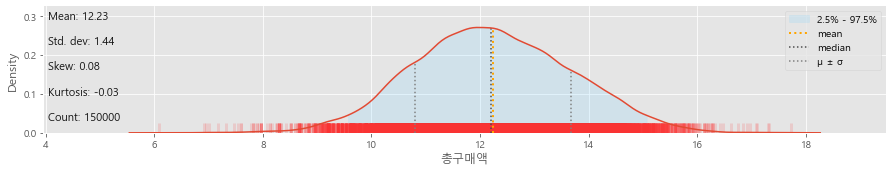

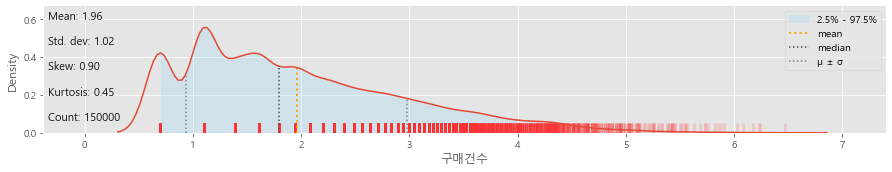

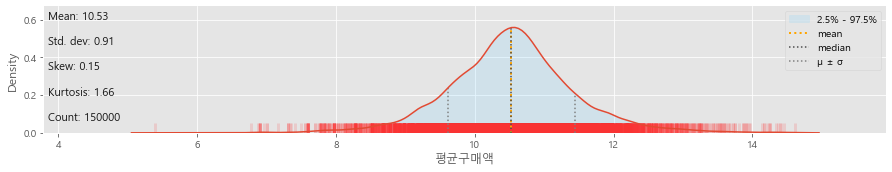

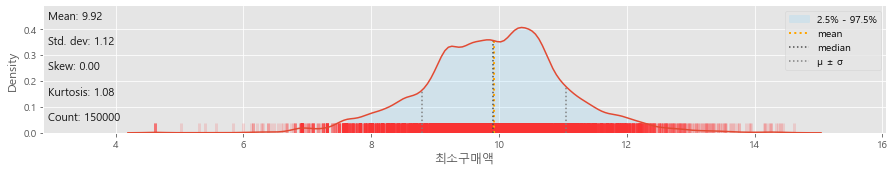

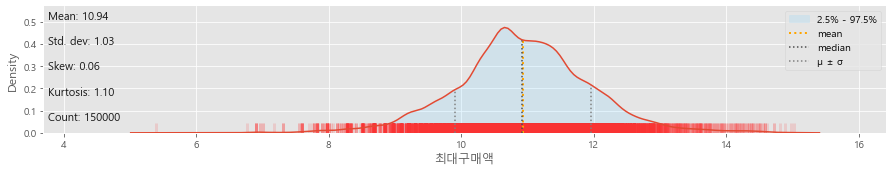

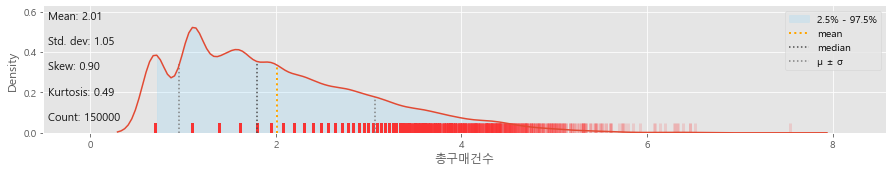

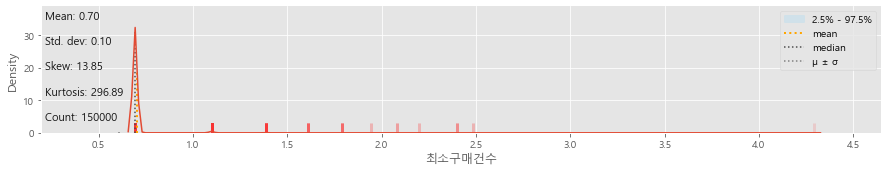

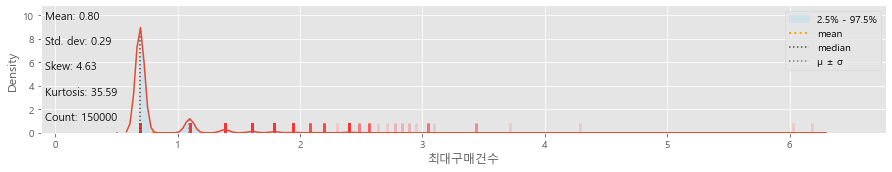

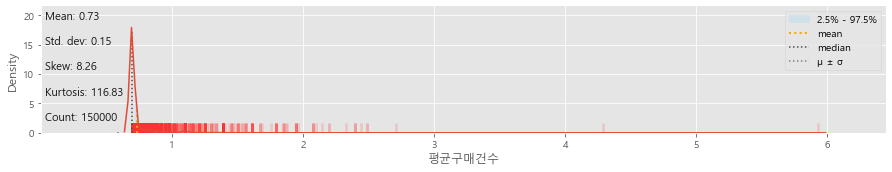

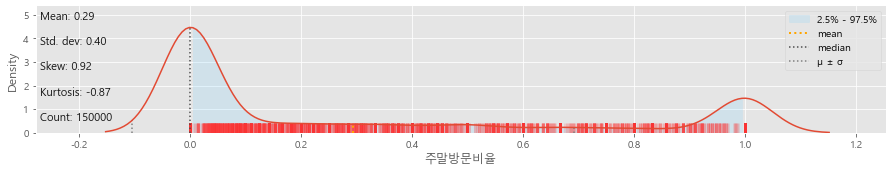

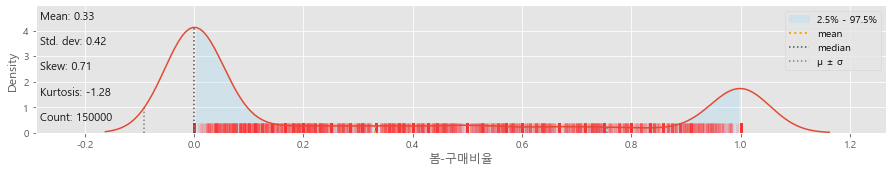

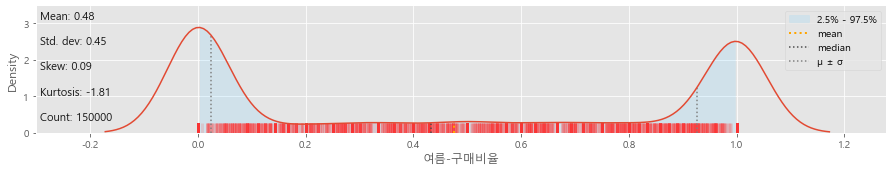

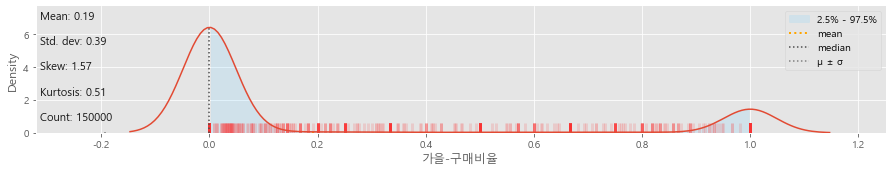

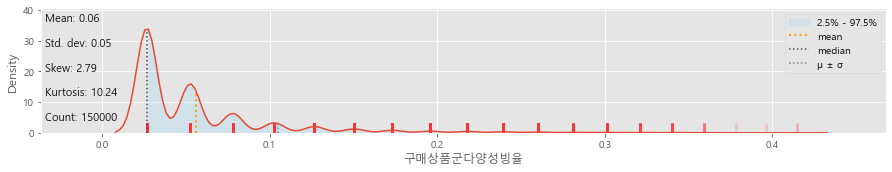

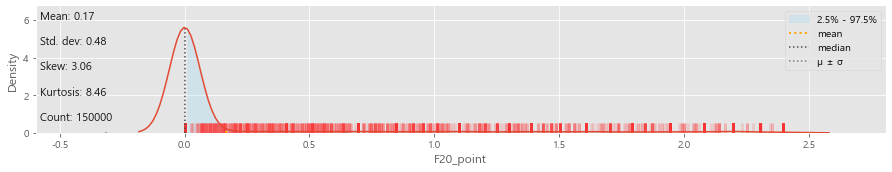

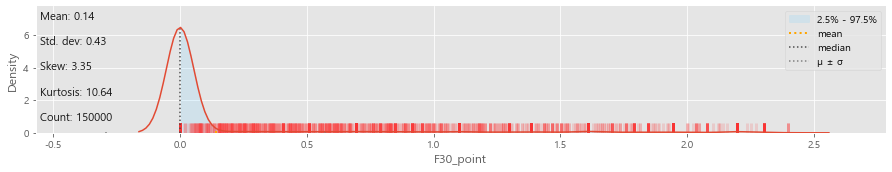

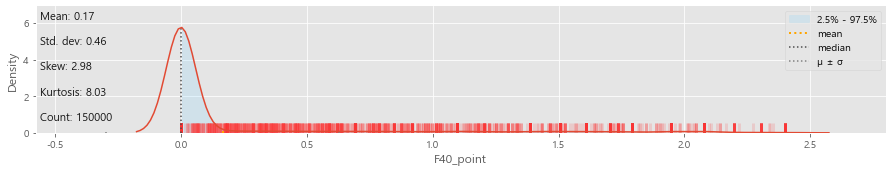

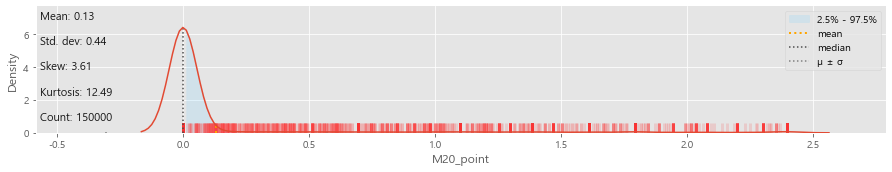

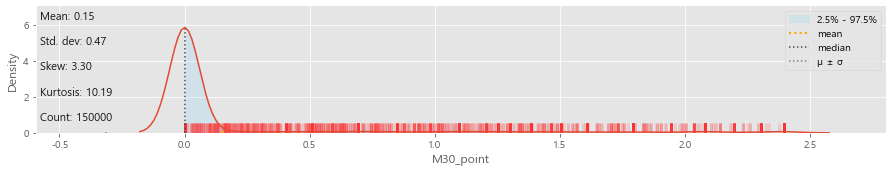

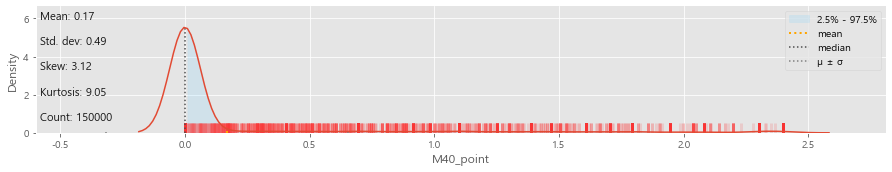

In [262]:
klib.dist_plot(data[select_list])

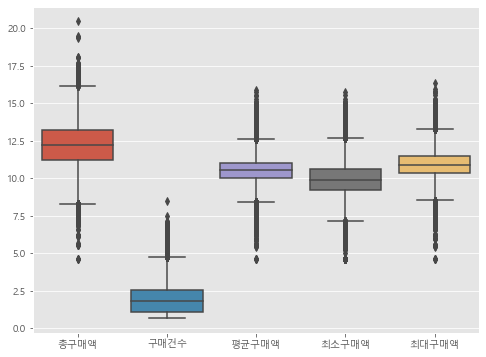

In [261]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data.loc[:,('총구매액', '구매건수', '평균구매액', '최소구매액', '최대구매액')])
plt.show()

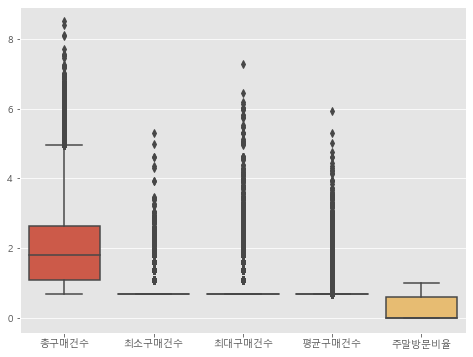

In [264]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data.loc[:,('총구매건수', '최소구매건수', '최대구매건수', '평균구매건수', '주말방문비율')])
plt.show()

In [ ]:
#data_num_features = data.select_dtypes(exclude='object').columns.to_list()
#data_te_num_features = data_te.select_dtypes(exclude='object').columns.to_list()

In [ ]:
#data[data_num_features] = data[data_num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)
#data_te[data_te_num_features] = data_te[data_te_num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [51]:
cust_tr = data.CLNT_ID
cust_te = data_te.CLNT_ID 

## 임발란스 데이터

In [17]:
df.LABEL.value_counts()

NameError: name 'df' is not defined

<AxesSubplot:xlabel='LABEL', ylabel='count'>

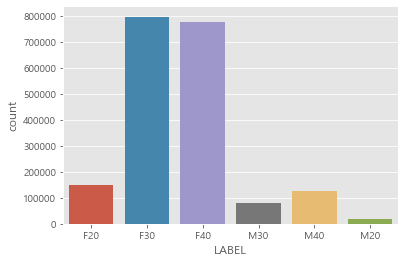

In [185]:
sns.countplot(x='LABEL',data=df)

In [54]:
data=data.fillna(0)
data_te=data_te.fillna(0)

In [55]:
X = data.drop(columns=['CLNT_ID'])
X_test = data_te.drop(columns=['CLNT_ID'])

y =  pd.read_csv('y_train.csv').LABEL

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#테스트 스케일링은 data leakge 방지를 위해 transform만
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_columns=X.columns

In [58]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_columns)

# 2주차 과제 예시 활용 GridSearch, RandomSearch

100%|██████████| 95/95 [2:58:37<00:00, 112.81s/it]  


(51, -1.23063936519348)


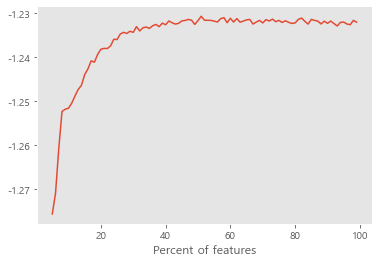

In [59]:
from sklearn.naive_bayes import GaussianNB
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = LGBMClassifier()

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train_scaled, y)    
    cv_score = cross_val_score(model, X_new, y, scoring='neg_log_loss', cv=sscv).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [60]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_scaled, y)
X_train_select = fs.transform(X_train_scaled)
X_test_select = fs.transform(X_test_scaled)

In [61]:
XX_train_nothuman=X_train_scaled.copy()
XX_test_nothuman=X_test_scaled.copy()

In [62]:
print(X_train_select.shape)
print(XX_train_nothuman.columns[fs.get_support()].tolist()) #get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(150000, 266)
['총구매액', '구매건수', '평균구매액', '최소구매액', '최대구매액', '총구매건수', '최소구매건수', '최대구매건수', '평균구매건수', '주말방문비율', '봄-구매비율', '여름-구매비율', '가을-구매비율', '구매상품군다양성빙율', 'F20_point', 'F30_point', 'F40_point', 'M20_point', 'M30_point', 'M40_point', '브랜드다양성', '히트세션평균', '총세션시간평균', '페이지접속건수', '평균페이지조회건수', '최대페이지조회건수', '구매세션평균', '평균검색건수', '최대검색건수', '상품금액평균', '최저가 구매 상품', '최고가 구매 상품', '상반기-구매비율', '하반기-구매비율', '검색 키워드 개수', 'mobile', 'tablet', '구매일 수', '구매 주기', '상품의종류', '지역', '여성선호품목구매건수', '남성선호품목구매건수', '여성선호품목구매비율', '남성선호품목구매비율', '0주거지', '1주거지', '2주거지', '3주거지', '5주거지', '8주거지', '10주거지', '13주거지', '15주거지', '20주거지', '0주구매상품', '1주구매상품', '2주구매상품', '3주구매상품', '4주구매상품', '5주구매상품', '6주구매상품', '7주구매상품', '8주구매상품', '9주구매상품', '10주구매상품', '11주구매상품', '12주구매상품', '14주구매상품', '16주구매상품', '17주구매상품', '18주구매상품', '19주구매상품', '20주구매상품', '21주구매상품', '23주구매상품', '24주구매상품', '25주구매상품', '26주구매상품', '27주구매상품', '28주구매상품', '29주구매상품', '구매상품군다양수', '키워드검색다양수', '구매상품군2다양수', '구매상품군3다양수', '키워드검색평균', '키워드검색최소', '키워드검색최대', '내점일수', '구매주기', '내점당 구매건수', '내점당 구매

In [63]:
X_train_select=X_train_scaled[select_columns]
X_test_select=X_test_scaled[select_columns]

NameError: name 'select_columns' is not defined

In [22]:
select_columns=['총구매액', '구매건수', '평균구매액', '최소구매액', '최대구매액', '총구매건수', '최소구매건수', '최대구매건수', '평균구매건수', '주말방문비율', '봄-구매비율', '여름-구매비율', '가을-구매비율', '구매상품군다양성빙율', 'F20_point', 'F30_point', 'F40_point', 'M20_point', 'M30_point', 'M40_point', '브랜드다양성', '히트세션평균', '총세션시간평균', '페이지접속건수', '평균페이지조회건수', '최대페이지조회건수', '구매세션평균', '평균검색건수', '최대검색건수', '상품금액평균', '최저가 구매 상품', '최고가 구매 상품', '상반기-구매비율', '하반기-구매비율', '검색 키워드 개수', 'mobile', 'tablet', '구매일 수', '구매 주기', '상품의종류', '지역', '여성선호품목구매건수', '남성선호품목구매건수', '여성선호품목구매비율', '남성선호품목구매비율', '0주거지', '1주거지', '2주거지', '3주거지', '5주거지', '8주거지', '10주거지', '13주거지', '15주거지', '20주거지', '0주구매상품', '1주구매상품', '2주구매상품', '3주구매상품', '4주구매상품', '5주구매상품', '6주구매상품', '7주구매상품', '8주구매상품', '9주구매상품', '10주구매상품', '11주구매상품', '12주구매상품', '14주구매상품', '16주구매상품', '17주구매상품', '18주구매상품', '19주구매상품', '20주구매상품', '21주구매상품', '23주구매상품', '24주구매상품', '25주구매상품', '26주구매상품', '27주구매상품', '28주구매상품', '29주구매상품', '구매상품군다양수', '키워드검색다양수', '구매상품군2다양수', '구매상품군3다양수', '키워드검색평균', '키워드검색최소', '키워드검색최대', '내점일수', '구매주기', '내점당 구매건수', '내점당 구매액비율', '내점당 구매건수비율', '0대분류상품갯수', '1대분류상품갯수', '2대분류상품갯수', '3대분류상품갯수', '4대분류상품갯수', '5대분류상품갯수', '6대분류상품갯수', '7대분류상품갯수', '8대분류상품갯수', '9대분류상품갯수', '10대분류상품갯수', '11대분류상품갯수', '12대분류상품갯수', '0중분류상품갯수', '1중분류상품갯수', '2중분류상품갯수', '3중분류상품갯수', '4중분류상품갯수', '5중분류상품갯수', '6중분류상품갯수', '7중분류상품갯수', '8중분류상품갯수', '9중분류상품갯수', '10중분류상품갯수', '11중분류상품갯수', '12중분류상품갯수', '13중분류상품갯수', '14중분류상품갯수', '15중분류상품갯수', '16중분류상품갯수', '17중분류상품갯수', '18중분류상품갯수', '19중분류상품갯수', '20중분류상품갯수', '21중분류상품갯수', '22중분류상품갯수', '23중분류상품갯수', '24중분류상품갯수', '25중분류상품갯수', '26중분류상품갯수', '27중분류상품갯수', '30중분류상품갯수', '31중분류상품갯수', '32중분류상품갯수', '33중분류상품갯수', '34중분류상품갯수', '36중분류상품갯수', '38중분류상품갯수', '39중분류상품갯수', '41중분류상품갯수', '42중분류상품갯수', '43중분류상품갯수', '44중분류상품갯수', '45중분류상품갯수', '46중분류상품갯수', '48중분류상품갯수', '49중분류상품갯수', '53중분류상품갯수', '56중분류상품갯수', '57중분류상품갯수', '59중분류상품갯수', '60중분류상품갯수', '62중분류상품갯수', '63중분류상품갯수', '64중분류상품갯수', '0소분류상품갯수', '1소분류상품갯수', '2소분류상품갯수', '3소분류상품갯수', '4소분류상품갯수', '6소분류상품갯수', '7소분류상품갯수', '8소분류상품갯수', '9소분류상품갯수', '10소분류상품갯수', '11소분류상품갯수', '12소분류상품갯수', '13소분류상품갯수', '14소분류상품갯수', '15소분류상품갯수', '16소분류상품갯수', '17소분류상품갯수', '18소분류상품갯수', '19소분류상품갯수', '21소분류상품갯수', '22소분류상품갯수', '23소분류상품갯수', '24소분류상품갯수', '26소분류상품갯수', '27소분류상품갯수', '28소분류상품갯수', '30소분류상품갯수', '31소분류상품갯수', '32소분류상품갯수', '33소분류상품갯수', '34소분류상품갯수', '36소분류상품갯수', '37소분류상품갯수', '38소분류상품갯수', '39소분류상품갯수', '40소분류상품갯수', '42소분류상품갯수', '44소분류상품갯수', '45소분류상품갯수', '46소분류상품갯수', '48소분류상품갯수', '51소분류상품갯수', '52소분류상품갯수', '53소분류상품갯수', '54소분류상품갯수', '56소분류상품갯수', '58소분류상품갯수', '60소분류상품갯수', '61소분류상품갯수', '66소분류상품갯수', '67소분류상품갯수', '71소분류상품갯수', '73소분류상품갯수', '77소분류상품갯수', '78소분류상품갯수', '81소분류상품갯수', '84소분류상품갯수', '86소분류상품갯수', '95소분류상품갯수', '97소분류상품갯수', '100소분류상품갯수', '101소분류상품갯수', '103소분류상품갯수', '104소분류상품갯수', '105소분류상품갯수', '111소분류상품갯수', '115소분류상품갯수', '116소분류상품갯수', '119소분류상품갯수', '121소분류상품갯수', '123소분류상품갯수', '125소분류상품갯수', '127소분류상품갯수', '129소분류상품갯수', '130소분류상품갯수', '135소분류상품갯수', '137소분류상품갯수', '141소분류상품갯수', '143소분류상품갯수', '144소분류상품갯수', '146소분류상품갯수', '147소분류상품갯수', '149소분류상품갯수', '150소분류상품갯수', '162소분류상품갯수', '165소분류상품갯수', '166소분류상품갯수', '169소분류상품갯수', '171소분류상품갯수', '180소분류상품갯수', '184소분류상품갯수', '191소분류상품갯수', '200소분류상품갯수', '202소분류상품갯수', '204소분류상품갯수', '208소분류상품갯수', '211소분류상품갯수', '216소분류상품갯수', '224소분류상품갯수', '228소분류상품갯수', '230소분류상품갯수', '250소분류상품갯수', '252소분류상품갯수', '264소분류상품갯수', '266소분류상품갯수', '267소분류상품갯수', '280소분류상품갯수']

In [64]:
X_train_select=pd.DataFrame(X_train_select,columns=XX_train_nothuman.columns[fs.get_support()])
X_test_select=pd.DataFrame(X_test_select,columns=XX_train_nothuman.columns[fs.get_support()])

In [31]:
from sklearn.model_selection import train_test_split

X_train, valid_x, y_train, valid_y = train_test_split(X_samp, y_samp, test_size=0.3, random_state=42)

In [65]:
from sklearn.model_selection import train_test_split

X_train, valid_x, y_train, valid_y = train_test_split(X_train_select, y, test_size=0.3, random_state=42)

#  SHAP 피쳐임포턴스

[19:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


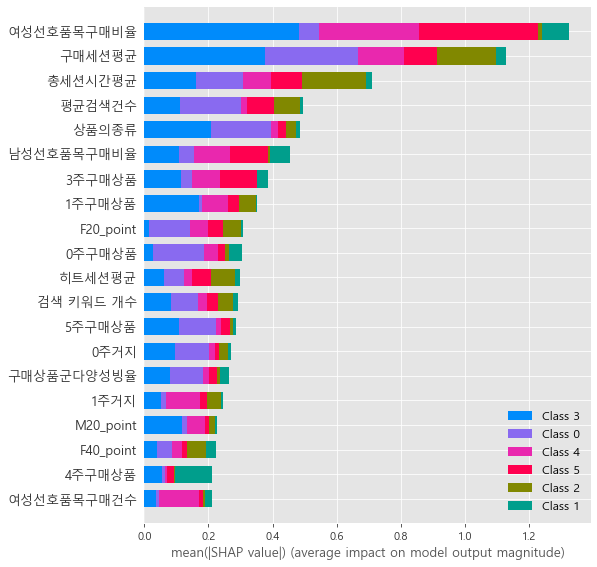

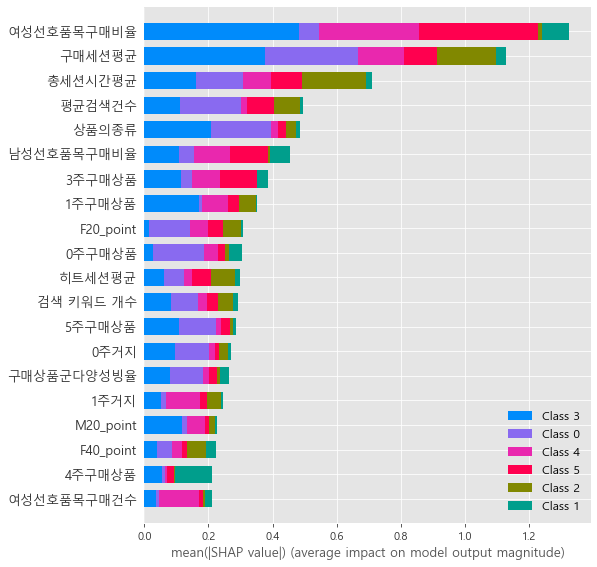

In [324]:
#SHAP로 피쳐임포턴스 확인
import shap


X_importance = X_test_select

model = XGBClassifier(random_state=0).fit(X_train_select, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)


#model = LGBMRegressor(random_state=0).fit(X_train_scaled, y)
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar')

#shap_sum = np.abs(shap_values).mean(axis=0)
#importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
#importance_df.columns = ['column_name', 'shap_importance']
#importance_df = importance_df.sort_values('shap_importance', ascending=False)
#importance_df

# LGBM 모델링, 피쳐중요도 확인

In [ ]:
model=LGBMClassifier(randomstate=0)

In [ ]:
model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: randomstate


LGBMClassifier(randomstate=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

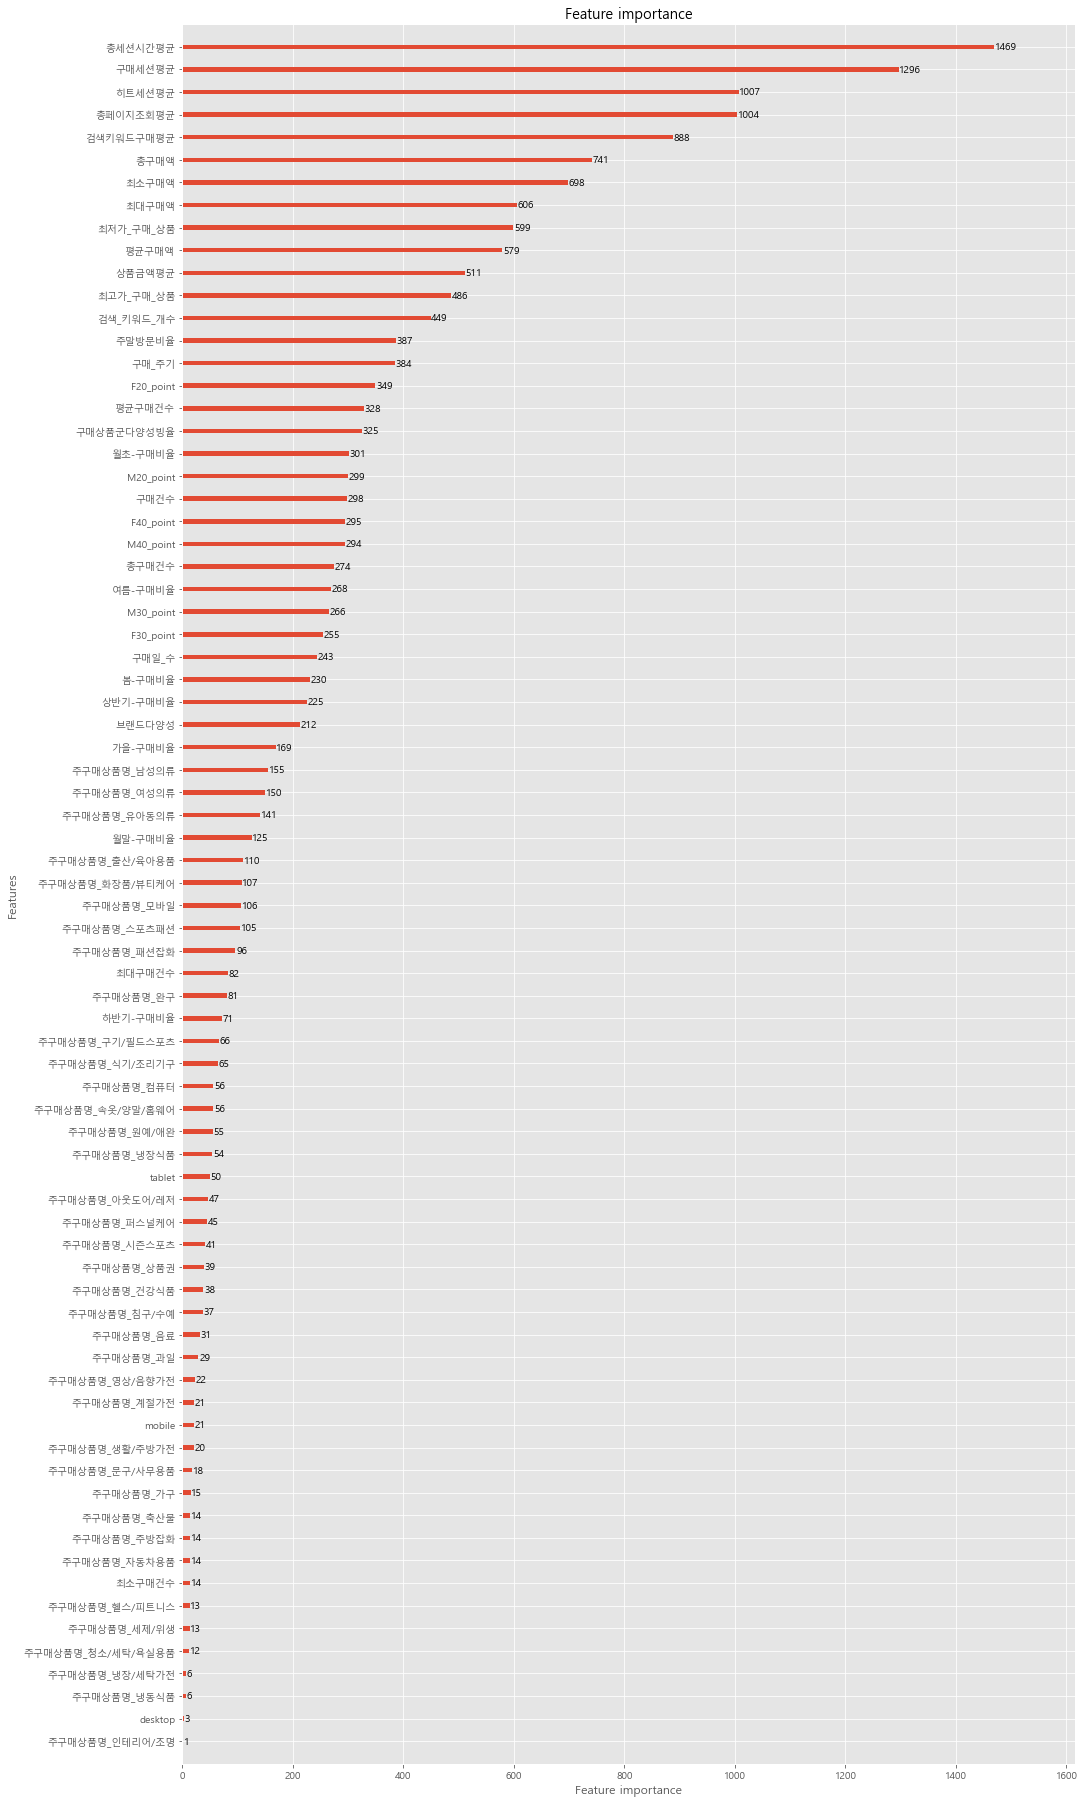

In [ ]:
from lightgbm import plot_importance
plot_importance(model, figsize=(16, 32), max_num_features=100)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(valid_x, valid_y))

pred=pd.DataFrame(model.predict_proba(X_test_scaled))
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

result.to_csv('머신러닝정복해조_1번째 제출.csv',index=False)

0.5167142857142857
0.4613555555555556


# 샘플링 기법

In [29]:
from imblearn.under_sampling import *
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_train_select, y)

In [49]:
#문제는 특이 치에있을 수 있습니다. 앞서 언급했듯이 ADASYN은 밀도가 낮은 밀도 데이터에 중점을 둡니다. 종종 저밀도 데이터는 특이 치입니다. 그런 다음 ADASYN 접근 방식은 피쳐 공간의 이러한 영역에 너무 많은주의를 기울여 모델 성능을 저하시킬 수 있습니다. ADASYN을 사용하기 전에 이상 값을 제거하는 것이 좋습니다.
from imblearn.over_sampling import *
X_samp, y_samp = ADASYN(random_state=0,sampling_strategy='minority').fit_sample(X, y)

In [30]:
y_samp.value_counts()

F30    45659
F40    38937
F20    11767
M40     6286
M30     4975
M20     2588
Name: LABEL, dtype: int64

In [28]:
y.value_counts()

F30    59892
F40    51936
F20    17727
M40     9904
M30     7953
M20     2588
Name: LABEL, dtype: int64

In [25]:
X_samp

,총구매액,구매건수,평균구매액,최소구매액,최대구매액,총구매건수,최소구매건수,최대구매건수,평균구매건수,주말방문비율,...,주거지_Jeollanam-doYeonggwang-gun,주거지_Jeollanam-doYeosu-si,주거지_SeoulSeoul,주거지_UlsanUlsan,상품종류_브랜드,상품종류_구매건수,여성선호품목구매건수,남성선호품목구매건수,여성선호품목구매비율,남성선호품목구매비율
0,11.367911,1.098612,10.674776,8.612685,11.302217,1.098612,0.693147,0.693147,0.693147,1.000000,...,0,0,0,0,0.000436,1.000000,0.000000,0.0,0.000000,0.0
1,11.911037,2.079442,9.965147,8.987322,10.712215,2.079442,0.693147,0.693147,0.693147,0.857143,...,0,0,0,0,0.000872,0.571429,0.000000,0.0,0.000000,0.0
2,13.196359,1.791759,11.586928,10.085851,12.983104,1.791759,0.693147,0.693147,0.693147,0.000000,...,0,0,1,0,0.000654,0.600000,1.609438,0.0,0.800000,0.0
3,13.460550,2.995732,10.516129,9.200391,11.350418,2.995732,0.693147,0.693147,0.693147,0.105263,...,0,0,1,0,0.007822,0.473684,2.079442,0.0,0.368421,0.0
4,11.472114,1.386294,10.373522,10.373522,10.373522,1.386294,0.693147,0.693147,0.693147,0.000000,...,0,0,0,0,0.000109,0.333333,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96565,10.950824,1.791759,9.341456,8.497195,9.787010,2.397895,0.693147,1.386294,1.098612,0.000000,...,0,0,0,0,0.000436,0.400000,0.000000,0.0,0.000000,0.0
96566,12.623799,2.484907,10.225933,8.612685,11.242441,2.484907,0.693147,0.693147,0.693147,0.000000,...,0,0,0,0,0.000981,0.272727,2.197225,0.0,0.727273,0.0
96567,13.832369,3.332205,10.536566,8.412055,11.407576,3.401197,0.693147,1.386294,0.729515,0.000000,...,0,0,0,0,0.005330,0.259259,2.564949,0.0,0.413793,0.0
96568,11.017005,1.386294,9.918425,9.532496,10.357775,1.386294,0.693147,0.693147,0.693147,1.000000,...,0,0,0,0,0.000981,1.000000,0.000000,0.0,0.000000,0.0


In [27]:
y_samp.value_counts()

F30    40808
F40    34366
F20     9705
M40     5044
M30     4059
M20     2588
Name: LABEL, dtype: int64

# 베이지안 활용 하이퍼파라미터튜닝 5주차 과제

In [310]:
X_train_select.replace([np.inf,-np.inf],np.nan,inplace=True)
X_test_select.replace([np.inf,-np.inf],np.nan,inplace=True)

In [311]:
X_train_select.fillna(0,inplace=True)
X_test_select.fillna(0,inplace=True)

In [67]:
Bay_opt_clfs = [] # 모델별 최고 성능 저장용 빈 리스트 생성
from bayes_opt import BayesianOptimization

In [313]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (100, 2000),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,64),
            'min_child_weight': (1, 10),
            'scale_pos_weight': (1,2)}

def LGBM_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight,scale_pos_weight):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'is_unbalance' : True,
        'scale_pos_weight' : scale_pos_weight,
        'n_jobs' : -1
    }
    LGBM = LGBMClassifier(**params)
    skf = StratifiedKFold(n_splits=5 , random_state=50)
    score = cross_val_score(LGBM, X_train, y_train, scoring='neg_log_loss', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_LGBM = BayesianOptimization(f = LGBM_opt, pbounds = pbounds, random_state=0)

In [68]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (100, 2000),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,64),
            'min_child_weight': (1, 10),
            'scale_pos_weight': (1,2)}

def LGBM_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight,scale_pos_weight):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        #'is_unbalance' : True,
        'scale_pos_weight' : scale_pos_weight,
        'n_jobs' : -1
    }
    LGBM = LGBMClassifier(**params)
    skf = StratifiedKFold(n_splits=5 , random_state=50)
    score = cross_val_score(LGBM, X_train, y_train, scoring='neg_log_loss', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_LGBM = BayesianOptimization(f = LGBM_opt, pbounds = pbounds, random_state=0)

In [69]:
Bay_LGBM.maximize(init_points=5, n_iter=25)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -4.086    |  0.8323   |  1.087    |  7.219    |  5.904    |  904.9    |  42.05    |  1.438    |  0.9338   |
|  2        | -2.456    |  0.8945   |  0.606    |  8.542    |  5.76     |  1.179e+0 |  59.39    |  1.071    |  0.8131   |
|  3        | -21.45    |  0.753    |  1.257    |  8.447    |  8.83     |  1.959e+0 |  51.55    |  1.461    |  0.9171   |
|  4        | -2.342    |  0.7677   |  0.9779   |  4.003    |  9.502    |  1.092e+0 |  27.71    |  1.265    |  0.9161   |
|  5        | -1.852    |  0.8184   |  0.8742   |  3.132    |  6.559    |  1.263e+0 |  40.25    |  1.944    |  0.9023   |
|  6        | -1.305    |  0.75     |  0.05     |  3.0      |  10.0     |  100.0    |  2.0      |  2.0      |  0.95     |
|  7        | -1.266    

In [70]:
Bay_LGBM.max

{'target': -1.232942730639251,
 'params': {'colsample_bytree': 0.8239575887071076,
  'learning_rate': 0.05,
  'max_depth': 3.0,
  'min_child_weight': 10.0,
  'n_estimators': 1579.4720377584083,
  'num_leaves': 14.744771522675027,
  'scale_pos_weight': 2.0,
  'subsample': 0.8}}

In [71]:
max_params = Bay_LGBM.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))

max_params

{'colsample_bytree': 0.8239575887071076,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 10.0,
 'n_estimators': 1579,
 'num_leaves': 15,
 'scale_pos_weight': 2.0,
 'subsample': 0.8}

In [72]:
Bay_opt_clfs=[]
LGBM_clf = LGBMClassifier(**max_params)

scores = cross_val_score(LGBM_clf, X_train, y_train, scoring='neg_log_loss', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((LGBM_clf.__class__.__name__, LGBM_clf, max(scores)))

[-1.2317679  -1.23234618 -1.22916107 -1.23887902]
최대성능: -1.2291610679631615
평균성능: -1.2330385396977144


In [73]:
Bay_opt_clfs

[('LGBMClassifier',
  LGBMClassifier(colsample_bytree=0.8239575887071076, learning_rate=0.05,
                 max_depth=3, min_child_weight=10.0, n_estimators=1579,
                 num_leaves=15, scale_pos_weight=2.0, subsample=0.8),
  -1.2291610679631615)]

In [603]:
lgbm = LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8366093246609547, learning_rate=0.05,
                      max_depth=8, min_child_weight=5.579129943585084,
                      n_estimators=624, num_leaves=7, scale_pos_weight=1.0,is_unbalance=True,
                      subsample=0.95)

In [604]:
lgbm.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.8366093246609547, is_unbalance=True,
               learning_rate=0.05, max_depth=8,
               min_child_weight=5.579129943585084, n_estimators=624,
               num_leaves=7, random_state=0, scale_pos_weight=1.0,
               subsample=0.95)

In [30]:
# is_unbalance 파라미터 추가
lgbm=LGBMClassifier(random_state=0,colsample_bytree=0.8421697059715312,
                 learning_rate=0.09795815763948315, max_depth=3,
                 min_child_weight=4.85916150248414, n_estimators=229,
                 num_leaves=18, scale_pos_weight=1.2211609153460838,
                 is_unbalance=True,
                 subsample=0.8379786790584278)

In [53]:
lgbm=LGBMClassifier(random_state=0)

In [54]:
lgbm.fit(X_train,y_train)

LGBMClassifier(random_state=0)

In [55]:
pred = lgbm.predict_proba(valid_x)
score = log_loss(valid_y,pred)

In [ ]:
new=pd.concat([X_samp, y_samp], axis=1)

In [56]:
new=new.sample(frac=1).reset_index(drop=True)

In [58]:
new_y=new.LABEL

In [ ]:
new.drop('LABEL',axis=1,inplace=True)

In [63]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(new):
    
    train_x = new.iloc[train_idx, :]
    train_y = new_y[train_idx]
    val_x = new.iloc[val_idx, :]
    val_y = new_y[val_idx]
    
    model = LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8366093246609547, 
                      learning_rate=0.05, 
                      max_depth=3, 
                      min_child_weight=1.0, 
                      n_estimators=393, 
                      num_leaves = 64,
                      scale_pos_weight=1.0,
                      objective = 'multiclass',
                      num_class = 6,
                      metric = 'multi_logloss',
                      #is_unbalance=True,
                      subsample =0.8)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["multi_logloss"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[393]	valid_0's multi_logloss: 1.20831
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[393]	valid_0's multi_logloss: 1.22526
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[393]	valid_0's multi_logloss: 1.21515
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[393]	valid_0's multi_logloss: 1.21029
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[393]	valid_0's multi_logloss: 1.21783
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[393]	valid_0's multi_logloss: 1.21465
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration 

In [ ]:
[('LGBMClassifier',
  LGBMClassifier(colsample_bytree=0.8239575887071076, learning_rate=0.05,
                 max_depth=3, min_child_weight=10.0, n_estimators=1579,
                 num_leaves=15, scale_pos_weight=2.0, subsample=0.8),
  -1.2291610679631615)]

In [74]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(X_train_select):
    
    train_x = X_train_select.iloc[train_idx, :]
    train_y = y[train_idx]
    val_x = X_train_select.iloc[val_idx, :]
    val_y = y[val_idx]
    
    model = LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8239575887071076, 
                      learning_rate=0.05, 
                      max_depth=3, 
                      min_child_weight=10, 
                      n_estimators=1579, 
                      num_leaves = 15,
                      scale_pos_weight=2.0,
                      objective = 'multiclass',
                      num_class = 6,
                      metric = 'multi_logloss',
                      #is_unbalance=True,
                      subsample =0.87)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["multi_logloss"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.22502
[1000]	valid_0's multi_logloss: 1.22087
Early stopping, best iteration is:
[1112]	valid_0's multi_logloss: 1.2207
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.226
[1000]	valid_0's multi_logloss: 1.22087
Early stopping, best iteration is:
[1056]	valid_0's multi_logloss: 1.22063
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.22361
[1000]	valid_0's multi_logloss: 1.22
Early stopping, best iteration is:
[1134]	valid_0's multi_logloss: 1.21972
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.22895
[1000]	valid_0's multi_logloss: 1.22447
Early stopping, best iteration is:
[1133]	valid_0's multi_logloss: 1.22428
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.2219
[1000]	valid_0's multi_logloss: 1.21828
Ea

In [75]:
result = []
for i in models:
    result.append(i.predict_proba(X_test_select))
predict = np.mean(result, axis = 0)

In [76]:
pd.DataFrame(predict)

,0,1,2,3,4,5
0,0.017083,0.643346,0.212720,0.001010,0.048749,0.077092
1,0.469186,0.260921,0.193622,0.023622,0.026037,0.026613
2,0.087854,0.323561,0.313369,0.026388,0.162181,0.086647
3,0.046828,0.395222,0.377741,0.002266,0.027560,0.150383
4,0.266683,0.341599,0.277326,0.011288,0.028250,0.074854
...,...,...,...,...,...,...
113099,0.216484,0.328174,0.395945,0.011299,0.019580,0.028516
113100,0.081432,0.366982,0.337948,0.012945,0.110099,0.090595
113101,0.019226,0.500652,0.411057,0.004538,0.027989,0.036538
113102,0.296287,0.381209,0.214900,0.014544,0.043481,0.049578


In [77]:
cust_te = data_te.CLNT_ID 

In [78]:
pred=pd.DataFrame(predict)
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

result.to_csv('머신러닝정복해조_1103_1번째 제출.csv',index=False)

# LR 하이퍼파라미터 튜닝

In [39]:
pbounds = { 'C': (0.1,1),}


def LR_opt(C):
    params = {
        'C' : C
    }

    LR = LogisticRegression(**params, n_jobs=-1, random_state=50)
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    score = cross_val_score(LR, X_train, y_train, scoring='neg_log_loss', cv=skf, n_jobs=-1)
    
    return np.mean(score)


Bay_LR = BayesianOptimization(f = LR_opt, pbounds = pbounds, random_state=0)

In [40]:
Bay_LR.maximize(init_points=50, n_iter=50)

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  nan      |  0.5939   |
|  2        |  nan      |  0.7437   |
|  3        |  nan      |  0.6425   |
|  4        |  nan      |  0.5904   |
|  5        |  nan      |  0.4813   |
|  6        |  nan      |  0.6813   |
|  7        |  nan      |  0.4938   |
|  8        |  nan      |  0.9026   |
|  9        |  nan      |  0.9673   |
|  10       |  nan      |  0.4451   |
|  11       |  nan      |  0.8126   |
|  12       |  nan      |  0.576    |
|  13       |  nan      |  0.6112   |
|  14       |  nan      |  0.933    |
|  15       |  nan      |  0.1639   |
|  16       |  nan      |  0.1784   |
|  17       |  nan      |  0.1182   |
|  18       |  nan      |  0.8494   |
|  19       |  nan      |  0.8003   |
|  20       |  nan      |  0.883    |
|  21       |  nan      |  0.9808   |
|  22       |  nan      |  0.8192   |
|  23       |  nan      |  0.5153   |
|  24       |  nan      |  0.8025   |


KeyboardInterrupt: 

In [ ]:
Bay_LR.max

{'target': 0.44793333333333335, 'params': {'C': 0.8830109334221372}}

In [ ]:
max_params = Bay_LR.max['params']

max_params

{'C': 0.8830109334221372}

In [ ]:
skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=0)

LR_clf = LogisticRegression(**max_params,  n_jobs=-1, random_state=0)

scores = cross_val_score(LR_clf, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((LR_clf.__class__.__name__, LR_clf, max(scores)))

[0.4464381  0.4511619  0.44731429 0.44681905]
최대성능: 0.45116190476190476
평균성능: 0.44793333333333335


# XGB 하이퍼파라미터튜닝

In [ ]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 100),
            'max_depth': (5,15),   
            'subsample': (0.8,0.95),  
            'colsample': (0.75,0.95),   
            'gamma': (0, 5)}


def XGB_opt(learning_rate, n_estimators, max_depth, subsample, colsample, gamma):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample,   
        'gamma': gamma,
        'n_jobs' : -1
    }
    XGB = XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    score = cross_val_score(XGB, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_XGB = BayesianOptimization(f = XGB_opt, pbounds = pbounds, random_state=0)

In [ ]:
Bay_XGB.maximize(init_points=50, n_iter=50)

In [ ]:
Bay_XGB.max

In [ ]:
max_params = Bay_XGB.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params

In [ ]:
XGB_clf = XGBClassifier(**max_params)

scores = cross_val_score(XGB_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((XGB_clf.__class__.__name__, XGB_clf, max(scores)))

# 스태킹

In [33]:
clfs_tuned

[('KNeighborsClassifier',
  RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=None, train_size=None),
                     estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                     param_distributions={'n_neighbors': [3, 5, 7, 9, 11],
                                          'weights': ['uniform', 'distance']},
                     random_state=0, scoring='neg_log_loss'),
  -4.1418844809477395),
 ('MLPClassifier',
  RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=None, train_size=None),
                     estimator=MLPClassifier(random_state=0), n_iter=5, n_jobs=-1,
                     param_distributions={'activation': ['tanh', 'relu'],
                                          'batch_size': ['auto', 32, 64, 128],
                                          'learning_rate': ['constant',
                                                            'adaptive'],
                                          'solver': ['sgd', 

In [ ]:
clfs = [
    (
        LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8594985843636087,  
                      max_depth=7, 
                      min_child_weight=1.4890418950532827, 
                      n_estimators=480, 
                      num_leaves = 3,
                      scale_pos_weight=1.7936977033574206,
                      is_unbalance=True,
                      subsample =0.8335887032090571),
        {
         'learning_rate': np.arange(0.1, 0.6, 0.1),}
    ),
    (
        AdaBoostClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
    ),
    (
        BaggingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        CatBoostClassifier(random_state=0,verbose=0),
        {'learning_rate': np.arange(0.1, 0.6, 0.1),
         'depth': [3,4,5]}
    ),
    (
        SGDClassifier(loss='log', random_state=0),
        {'penalty': ['l1','l2'],
         'alpha': [0.001, 0.05, 1, 100, 200],
         'max_iter': [1000, 2000, 3000]}
    ),
    (
        SVC(kernel='rbf', probability=True, random_state=0),              
        {'C': [0.01, 0.05, 1.0, 1.1],
         'gamma': np.arange(0.01, 1.0, 0.1)}
    ),
    (
        ExtraTreesClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5,6,7]}
    ),
    (
        DecisionTreeClassifier(random_state=0),              
        {'max_depth': range(2,9,1),        
         'criterion': ['gini', 'entropy']}
    ),
    (
        GaussianNB(),
        {'var_smoothing': np.arange(0.1,1.0,0.1)}
    ),
]

#clfs_tuned = []  # 튜닝된 모델을 저장

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='neg_log_loss', 
                                     cv=sscv, random_state=0, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(valid_x, valid_y)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))ㅠ
    clfs_tuned.append((clf_name, rand_search, clf_score))

 11%|█         | 1/9 [01:39<13:17, 99.67s/it]

LGBMClassifier                                      -1.259681 99.7


 22%|██▏       | 2/9 [10:27<40:59, 351.32s/it]

AdaBoostClassifier                                  -1.475063 527.5


 33%|███▎      | 3/9 [57:06<2:26:56, 1469.34s/it]

BaggingClassifier                                   -1.305020 2799.8


 44%|████▍     | 4/9 [1:07:06<1:33:49, 1125.93s/it]

CatBoostClassifier                                  -1.254343 599.5


 56%|█████▌    | 5/9 [1:08:33<50:05, 751.47s/it]   

SGDClassifier                                       -1.400809 87.5


In [32]:
clfs = [
    (
        KNeighborsClassifier(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance']}
    ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': ['auto', 32, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    #(
    #    LogisticRegression(random_state=0),  
    #    {'C': np.arange(0.1, 1.1, 0.1),}
    #),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [None,3,4,5],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        GradientBoostingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8594985843636087, 
                      learning_rate=0.29886303202908876, 
                      max_depth=7, 
                      min_child_weight=1.4890418950532827, 
                      n_estimators=480, 
                      num_leaves = 3,
                      scale_pos_weight=1.7936977033574206,
                      objective = 'multiclass',
                      num_class = 6,
                      metric = 'multi_logloss',
                      is_unbalance=True,
                      subsample =0.8335887032090571),
        {}
    ),
    (
        CatBoostClassifier(random_state=0),
        {'learning_rate': np.arange(0.1, 1.5, 0.1)}
    ),
    (
        AdaBoostClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
    ),
    (
        XGBClassifier(random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),  
]

    
clfs_tuned = []  # 튜닝된 모델을 저장

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='neg_log_loss', 
                                     cv=sscv, random_state=0, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(valid_x, valid_y)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

 12%|█▎        | 1/8 [28:20<3:18:20, 1700.08s/it]

KNeighborsClassifier                                -4.141884 1700.1


 25%|██▌       | 2/8 [1:03:04<3:12:37, 1926.30s/it]

MLPClassifier                                       -1.283874 2084.6


 38%|███▊      | 3/8 [1:08:33<1:39:43, 1196.65s/it]

RandomForestClassifier                              -1.304107 328.4


 50%|█████     | 4/8 [2:26:42<2:26:42, 2200.73s/it]

GradientBoostingClassifier                          -1.265030 4689.8


TypeError: cannot unpack non-iterable LGBMClassifier object

In [ ]:
# Initialize 1st level estimators
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',    
    'XGBClassifier',
    'LGBMClassifier',
    'AdaBoostClassifier',
    'BaggingClassifier',
    'CatBoostClassifier',
    'SGDClassifier',
    'SVC',
    'CatBoostClassifier',
    'ExtraTreesClassifier',
    'DecisionTreeClassifier',
    'GaussianNB'
]
estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=False, needs_proba=True, metric=None,
                            n_folds=3, stratified=True, shuffle=True, random_state=0)

# Fit
stack = stack.fit(X_train, y_train)

# Get your stacked features
S_train = stack.transform(X_train)
S_valid = stack.transform(X_valid)
S_test = stack.transform(X_test_sel)

# Use 2nd level estimator with stacked features
meta_model = LogisticRegression().fit(S_train, y_train)
print(roc_auc_score(y_valid, meta_model.predict_proba(S_valid)[:,1]))  

In [ ]:
# 2-layer stacking

# Initialize 1st level estimators
# 사용하지 않을 모델은 주석 처리하세요.
selected = [
    #'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    #'RandomForestClassifier', 
    #'GradientBoostingClassifier',    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=0), cv=3)

stk_clf.fit(X_train, y_train)
print(roc_auc_score(y_dev, stk_clf.predict_proba(X_dev)[:,1]))  